# House Pricing

# Import Library

In [131]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(color_codes=True)

# Import Data

In [132]:
df = pd.read_csv('dataset\kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.00,3,2.50,1530,1131,3.00,0,0,...,8,1530,0,2009,0,98103,47.70,-122.35,1530,1509
21609,6600060120,20150223T000000,400000.00,4,2.50,2310,5813,2.00,0,0,...,8,2310,0,2014,0,98146,47.51,-122.36,1830,7200
21610,1523300141,20140623T000000,402101.00,2,0.75,1020,1350,2.00,0,0,...,7,1020,0,2009,0,98144,47.59,-122.30,1020,2007
21611,291310100,20150116T000000,400000.00,3,2.50,1600,2388,2.00,0,0,...,8,1600,0,2004,0,98027,47.53,-122.07,1410,1287


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [134]:
df.duplicated().sum()

0

In [135]:
df['date'] = pd.to_datetime(df['date'])
df.drop('id', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21613 non-null  datetime64[ns]
 1   price          21613 non-null  float64       
 2   bedrooms       21613 non-null  int64         
 3   bathrooms      21613 non-null  float64       
 4   sqft_living    21613 non-null  int64         
 5   sqft_lot       21613 non-null  int64         
 6   floors         21613 non-null  float64       
 7   waterfront     21613 non-null  int64         
 8   view           21613 non-null  int64         
 9   condition      21613 non-null  int64         
 10  grade          21613 non-null  int64         
 11  sqft_above     21613 non-null  int64         
 12  sqft_basement  21613 non-null  int64         
 13  yr_built       21613 non-null  int64         
 14  yr_renovated   21613 non-null  int64         
 15  zipcode        2161

In [136]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.00,3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,2014-12-09,538000.00,3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,2015-02-25,180000.00,2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2014-12-09,604000.00,4,3.00,1960,5000,1.00,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,2015-02-18,510000.00,3,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


# Exploratory Data Analysis


In [137]:
df.describe()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,2014-10-29 04:38:01.959931648,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
min,2014-05-02 00:00:00,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2014-07-22 00:00:00,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,2014-10-16 00:00:00,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,2015-02-17 00:00:00,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,2015-05-27 00:00:00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00
std,NaN,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18


In [138]:
numerical_columns = df.select_dtypes(include=['int', 'float']).columns
numerical_columns = numerical_columns.drop('price')

Melihat korelasi antar kolom terhadap kolom y(price)

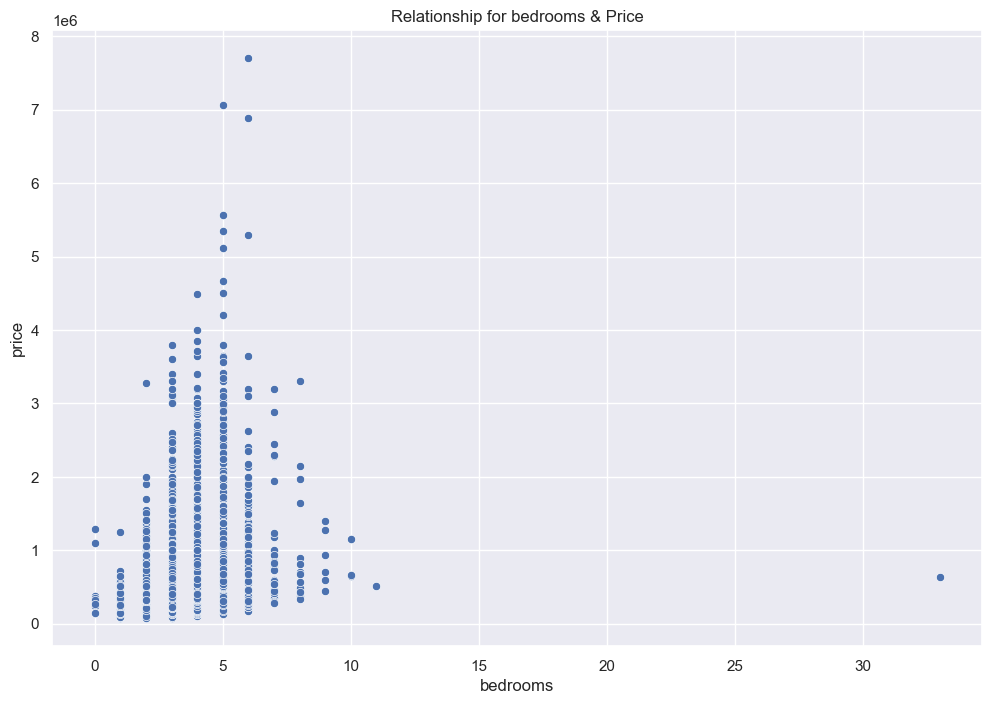

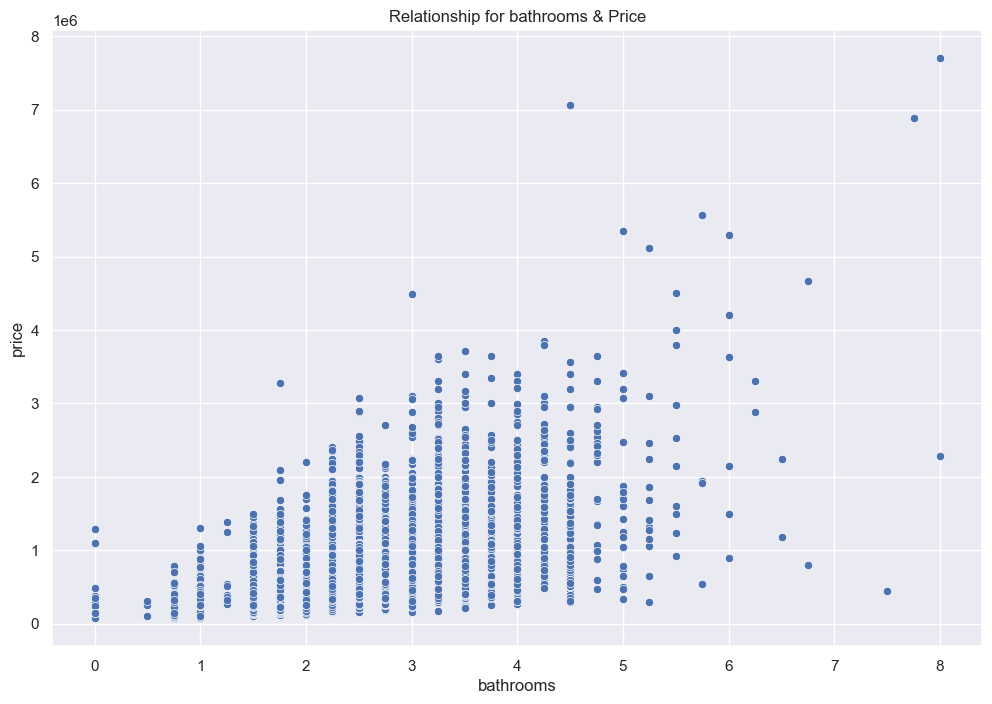

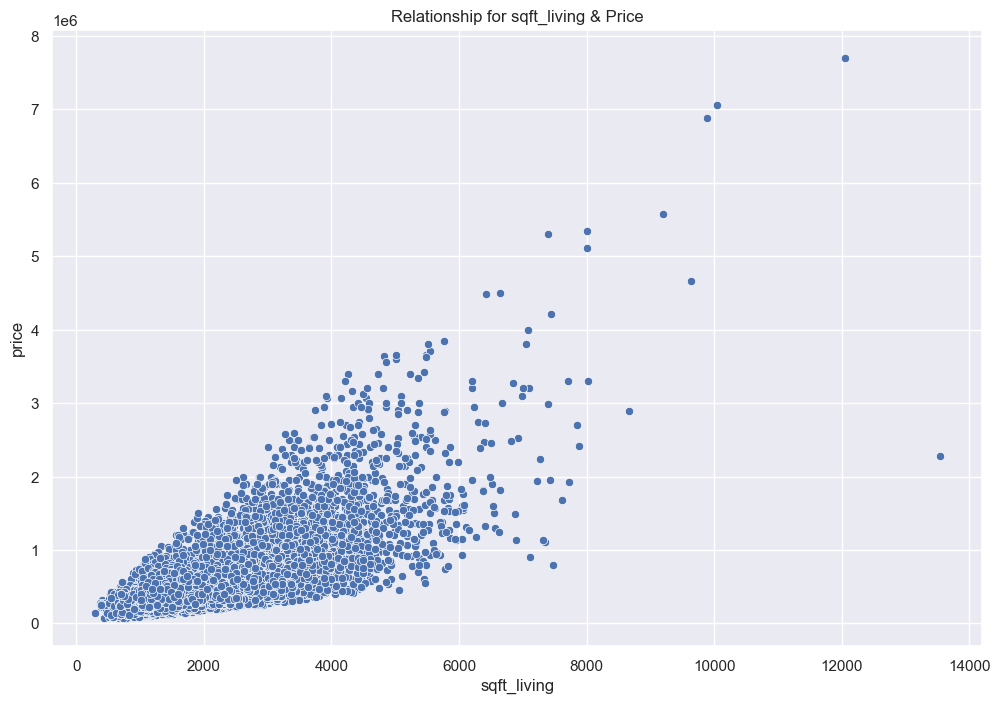

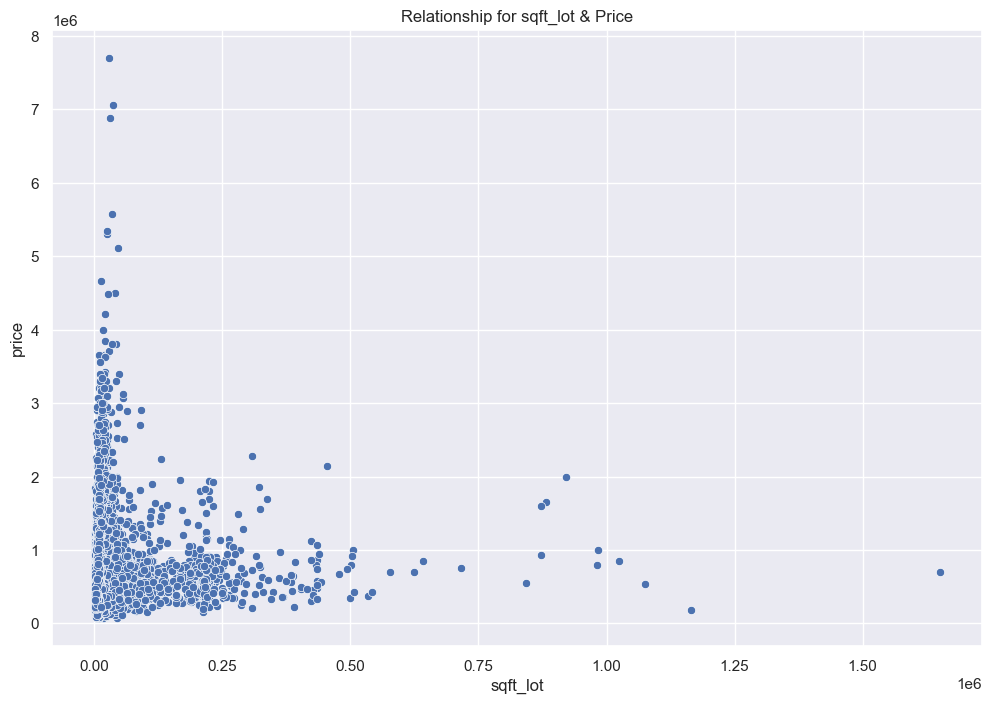

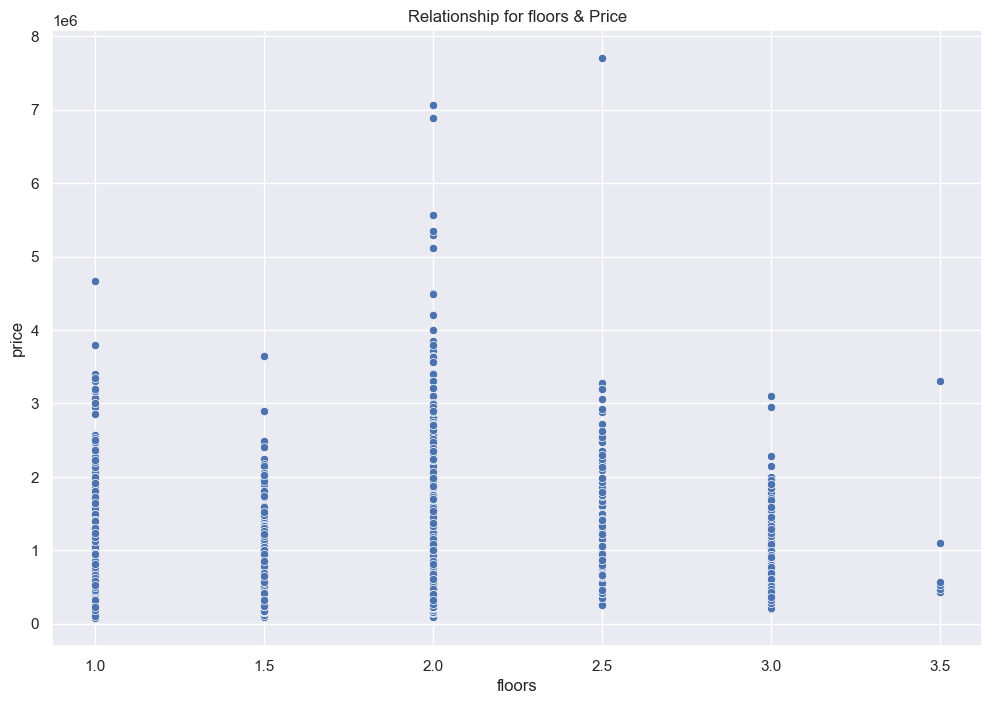

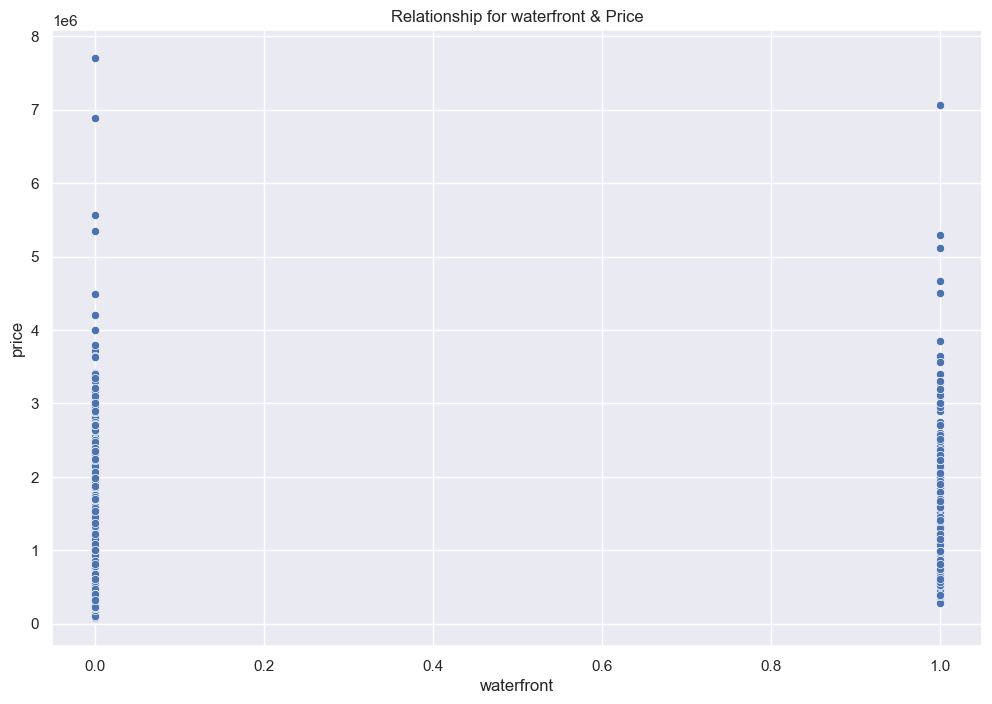

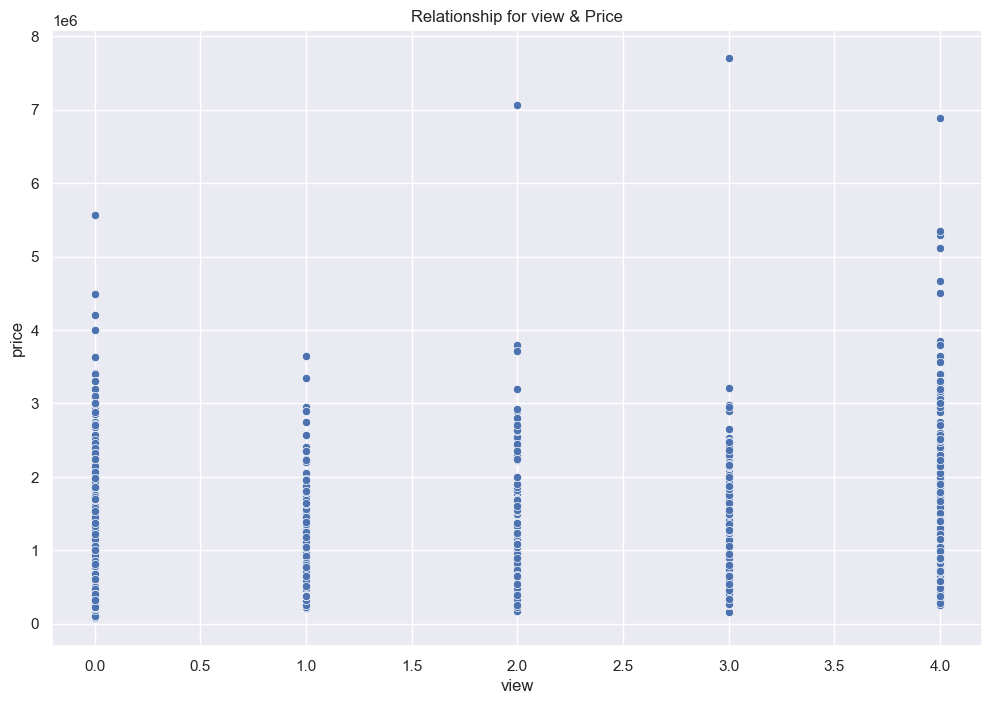

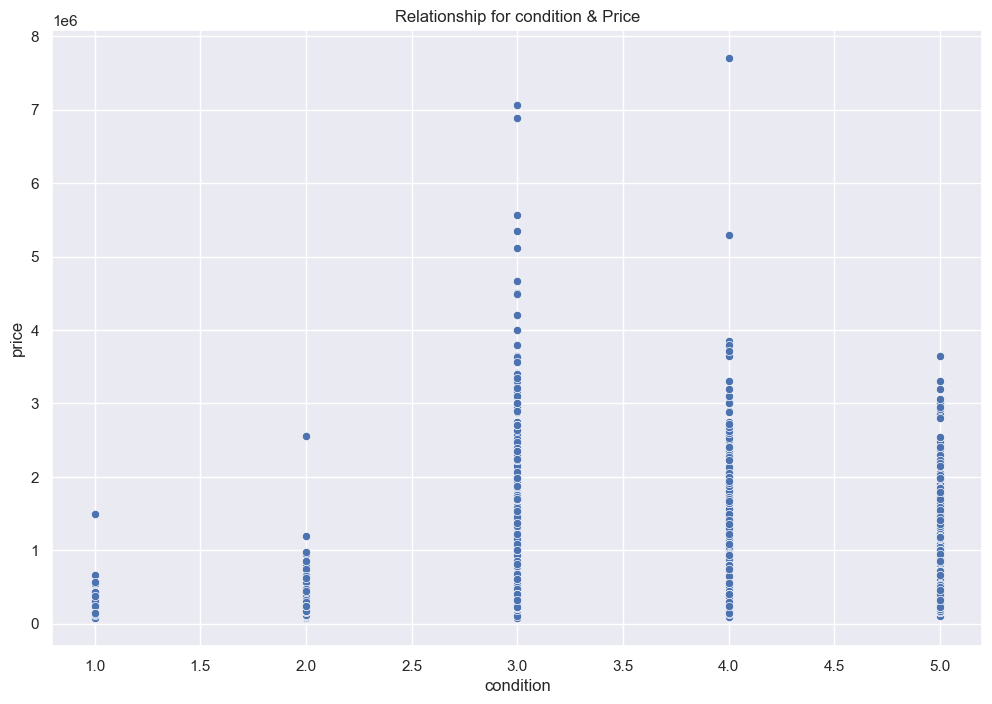

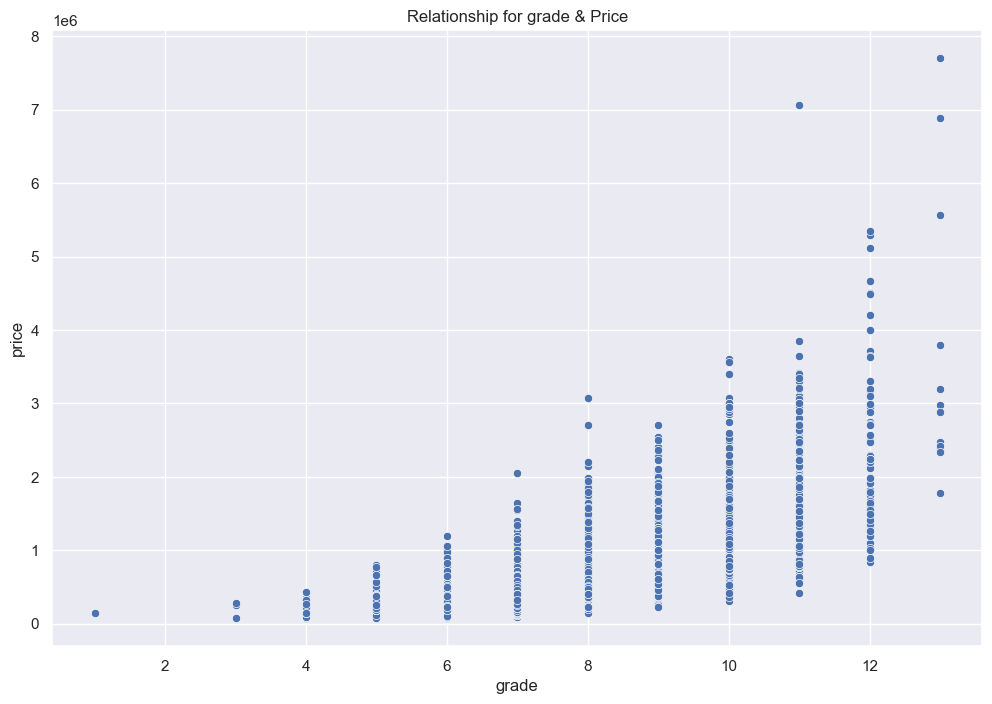

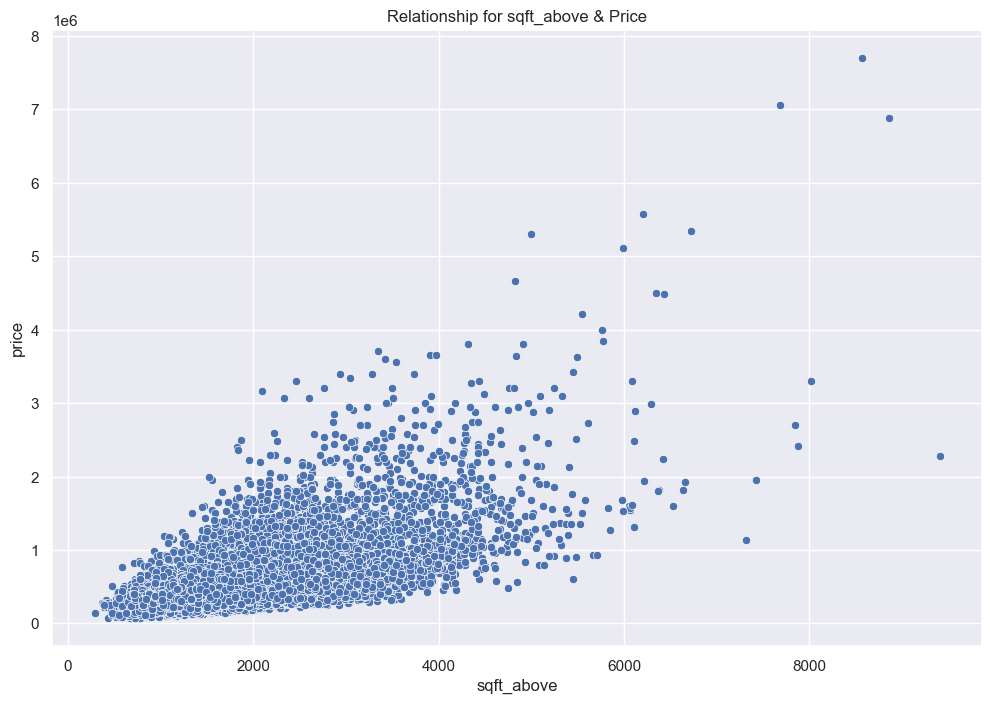

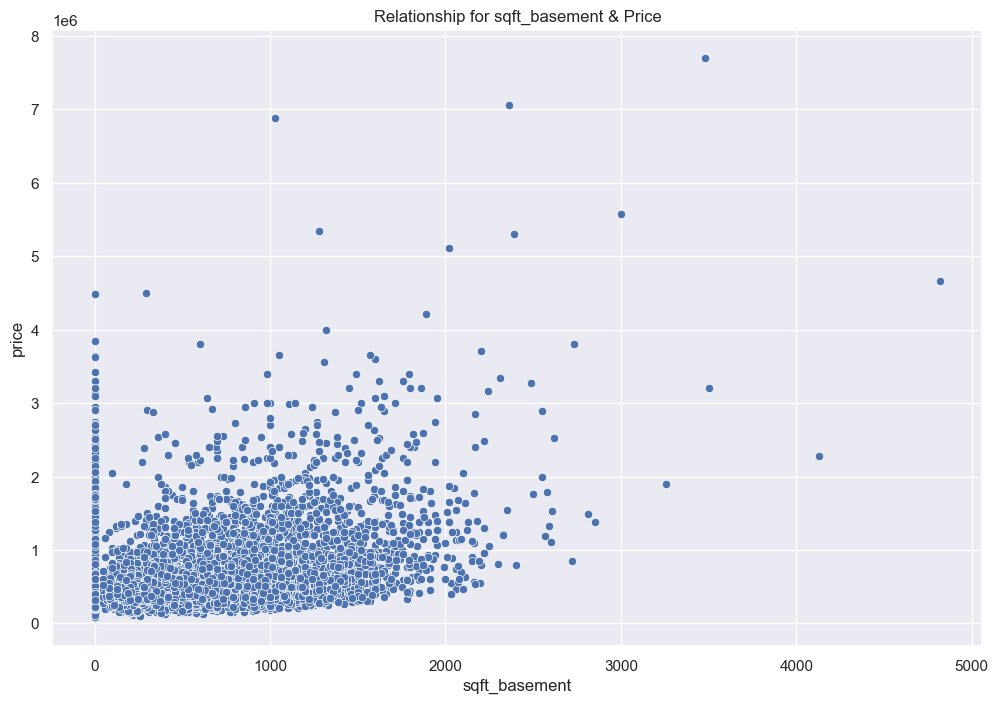

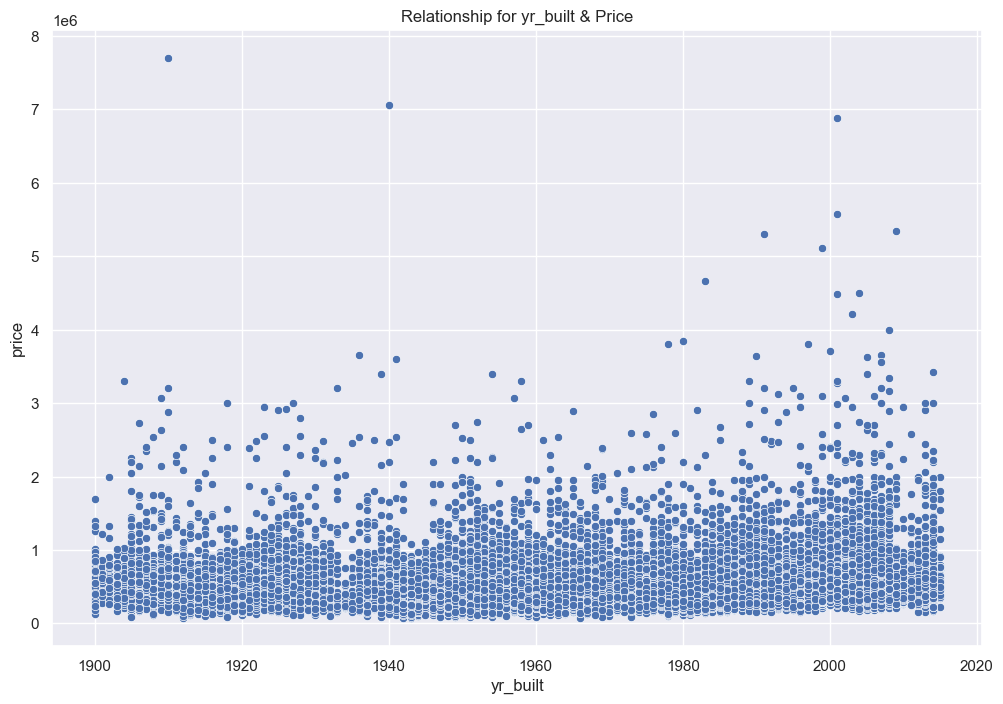

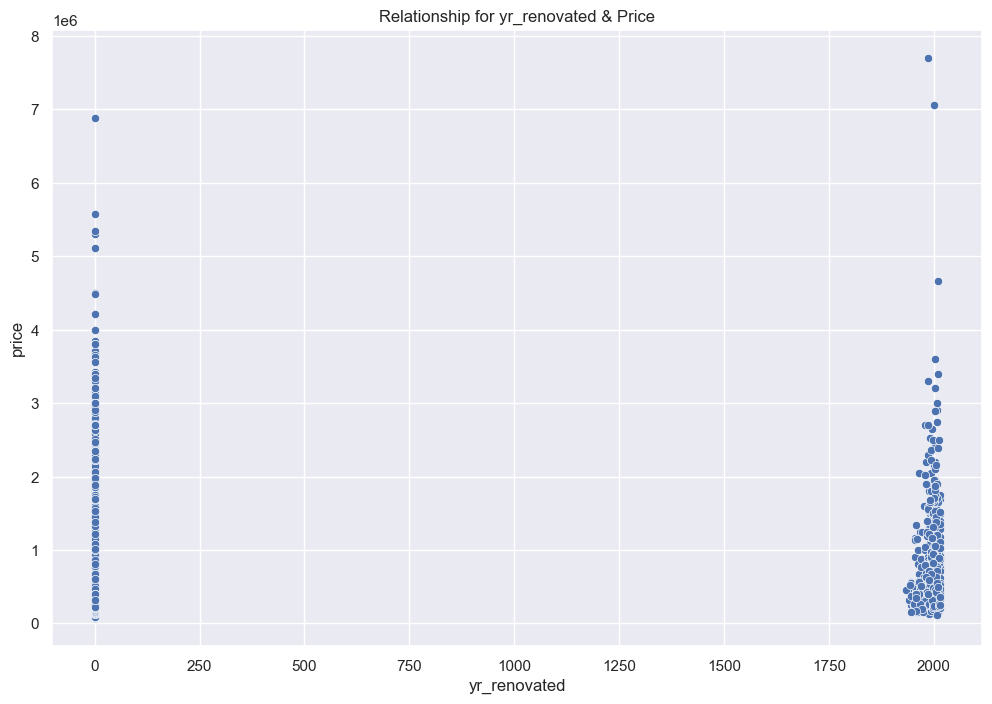

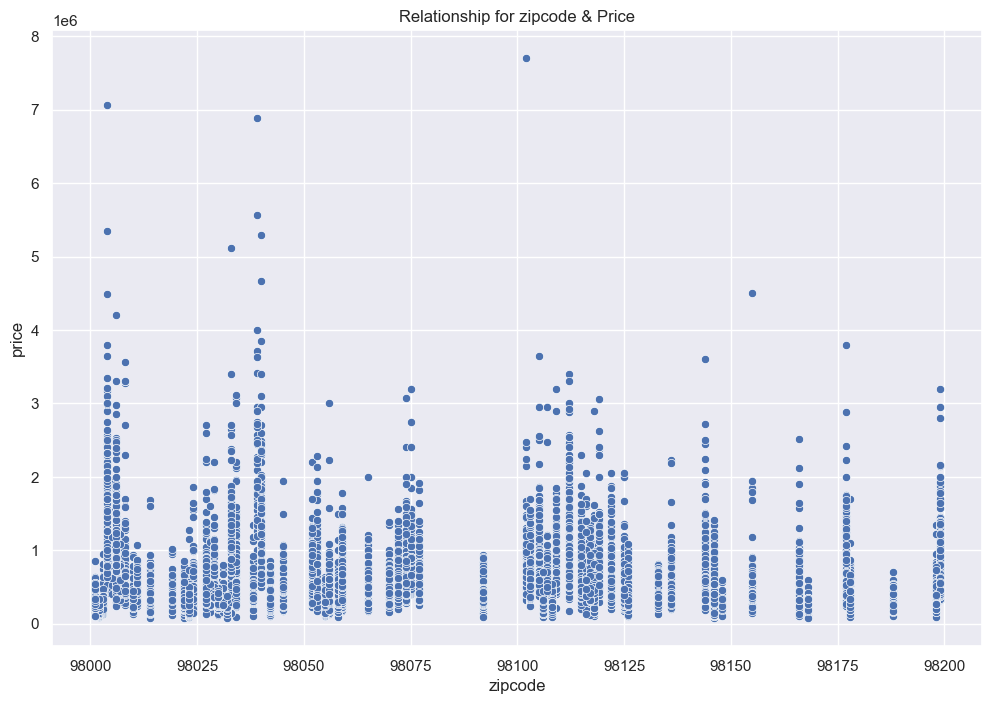

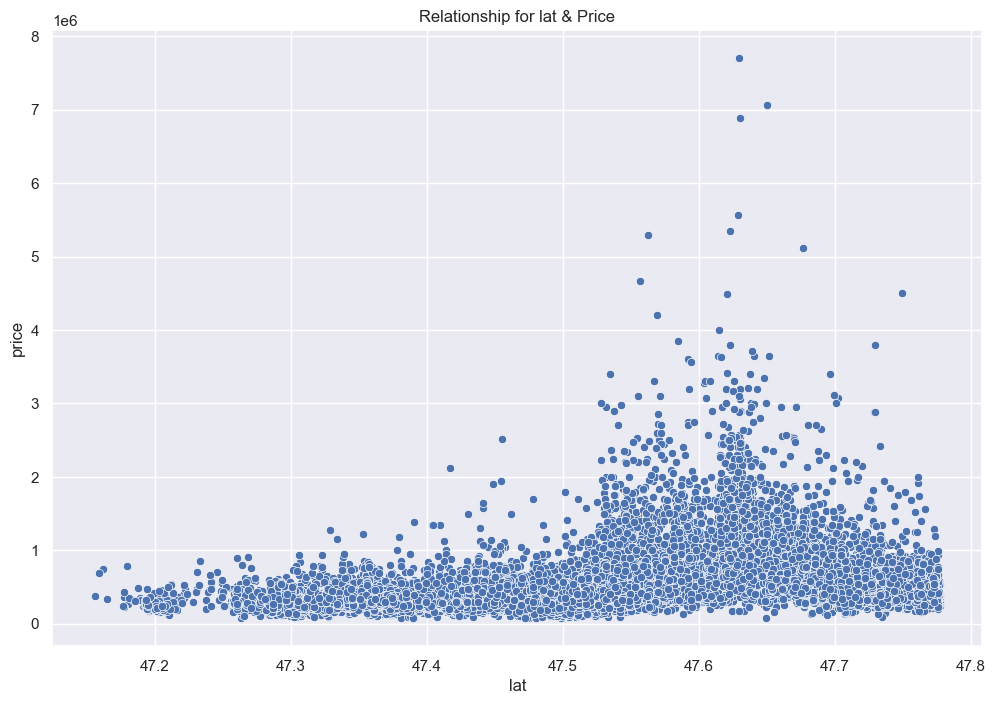

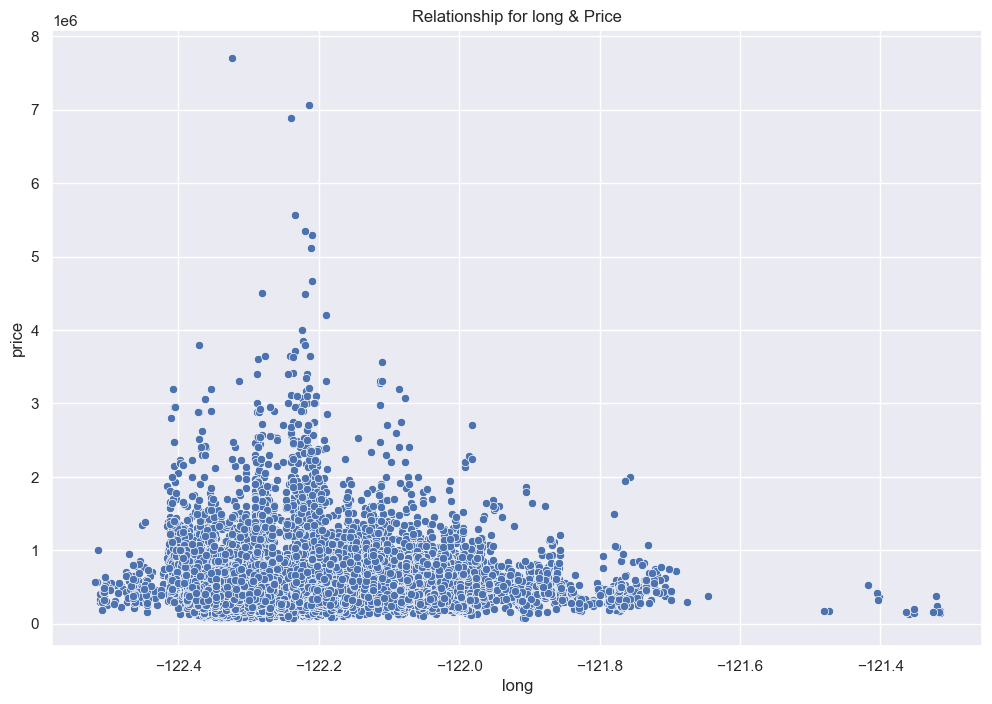

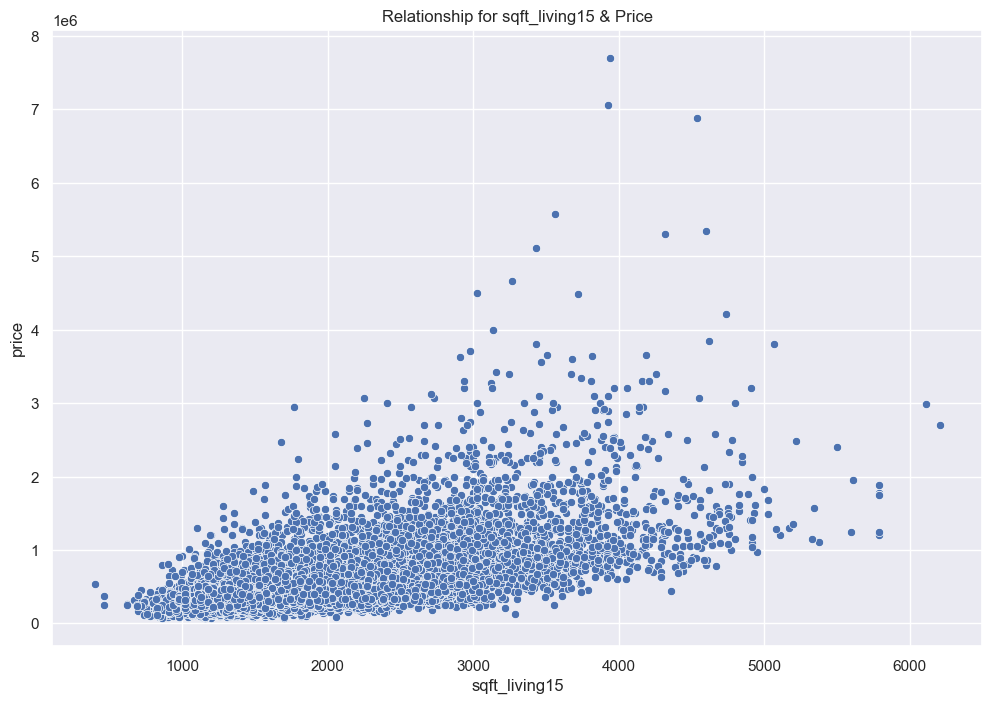

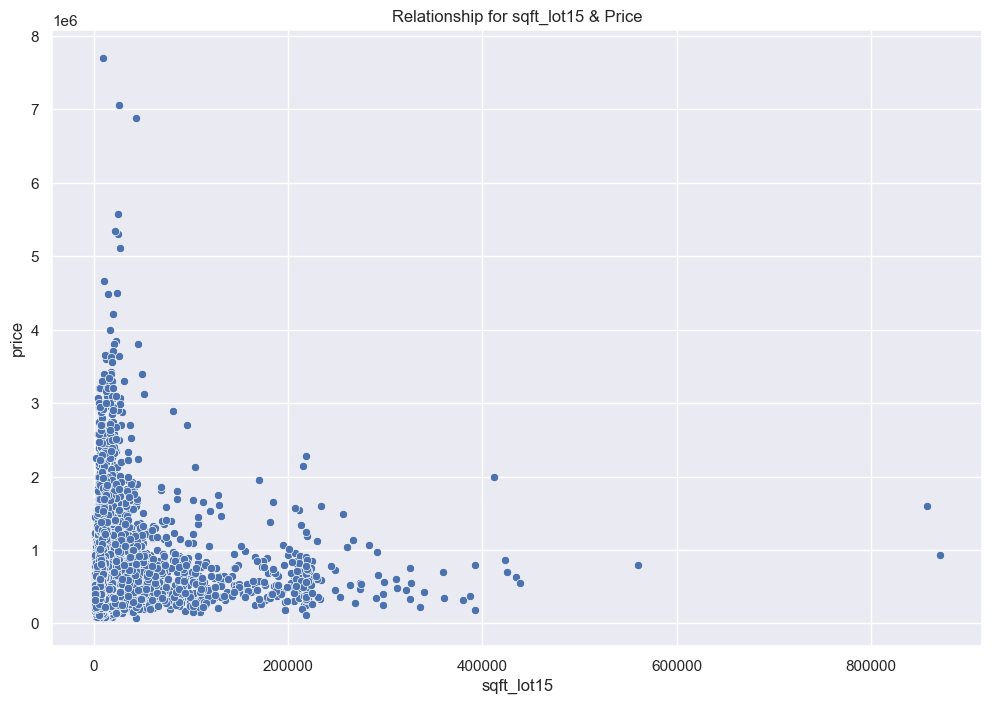

In [139]:
for column in numerical_columns:
    plt.figure(figsize=(12,8))
    sns.scatterplot(x=column, y='price',data=df)
    plt.title(f'Relationship for {column} & Price')
    plt.show()

Melihat distribusi data

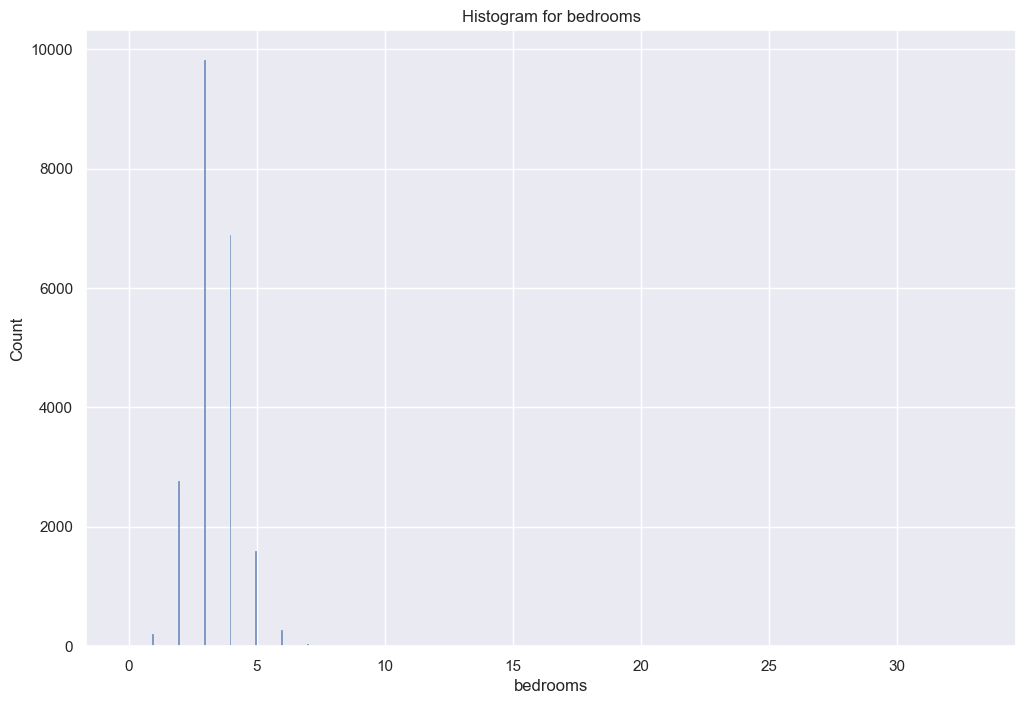

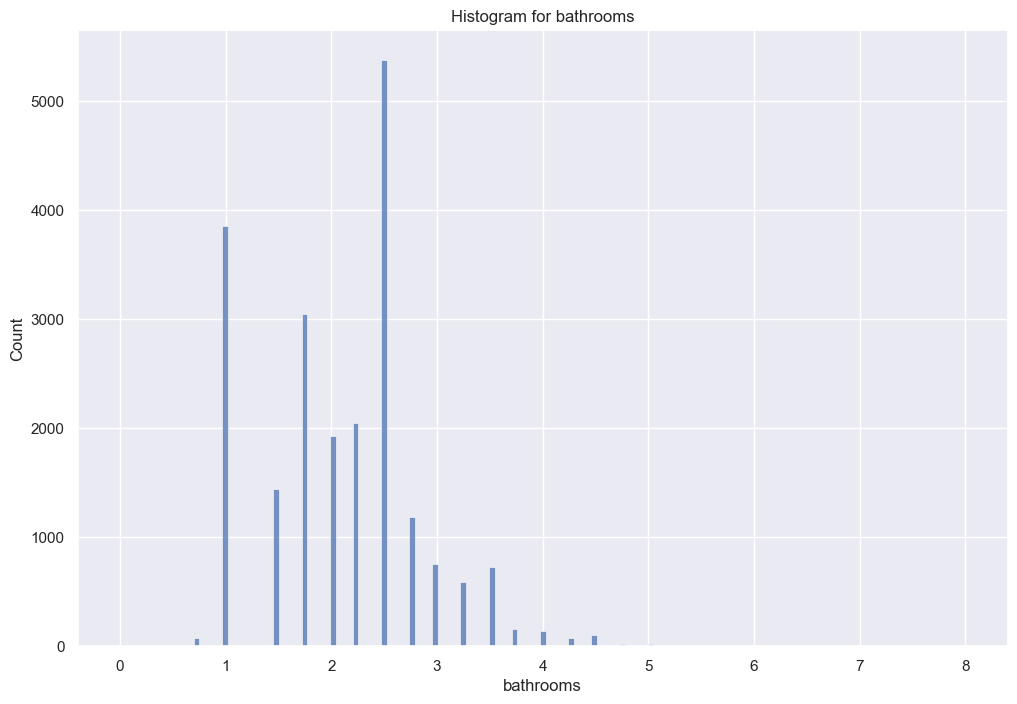

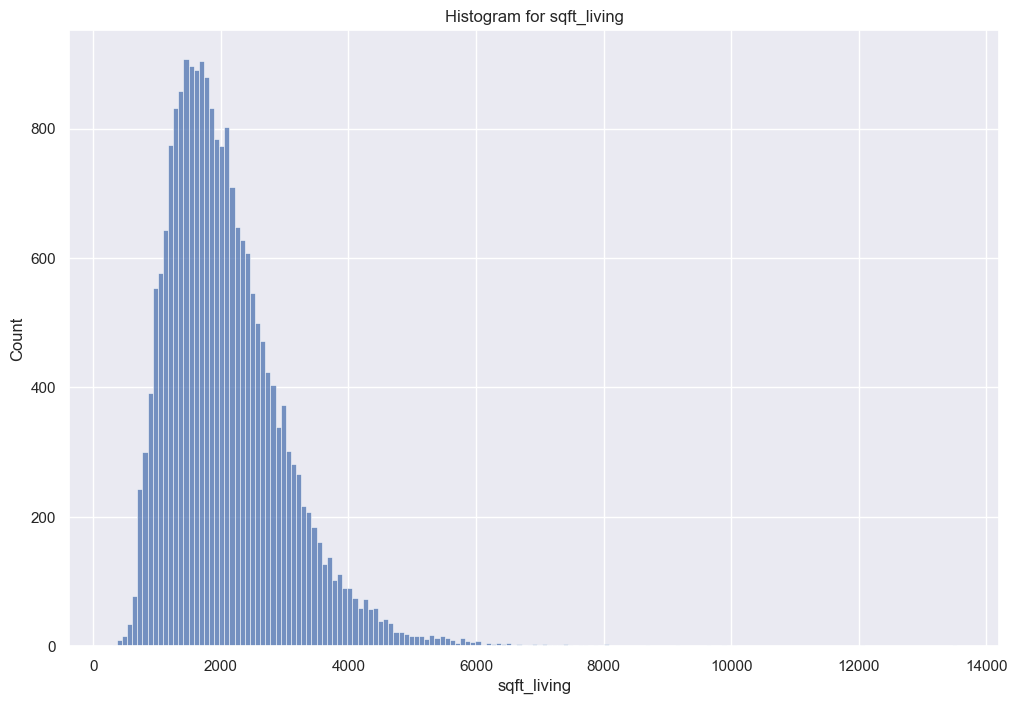

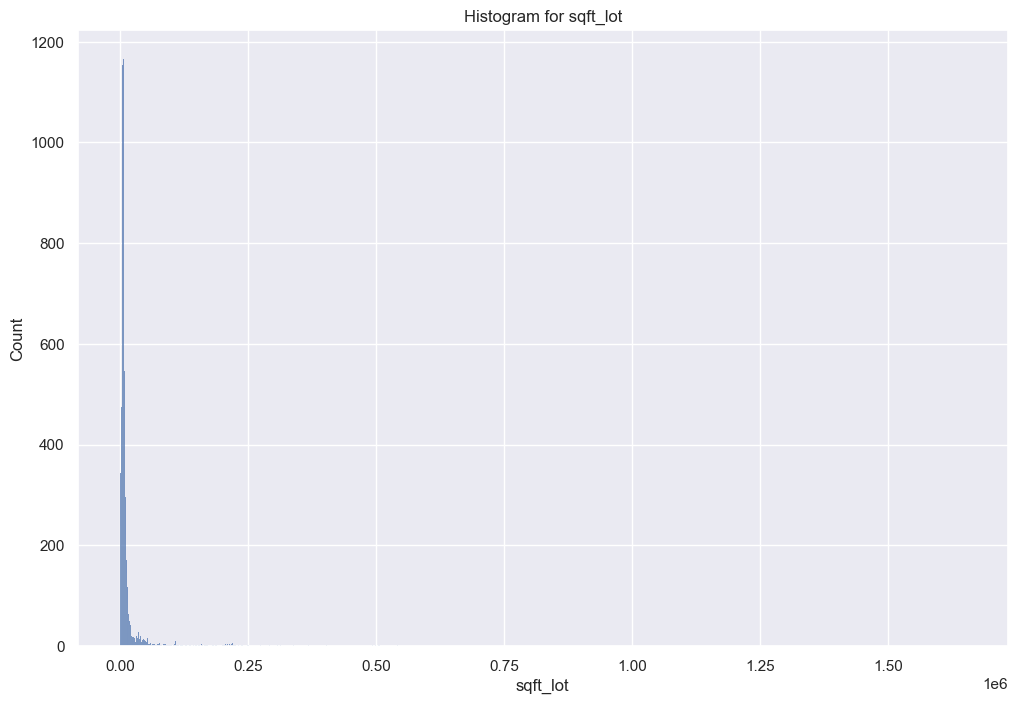

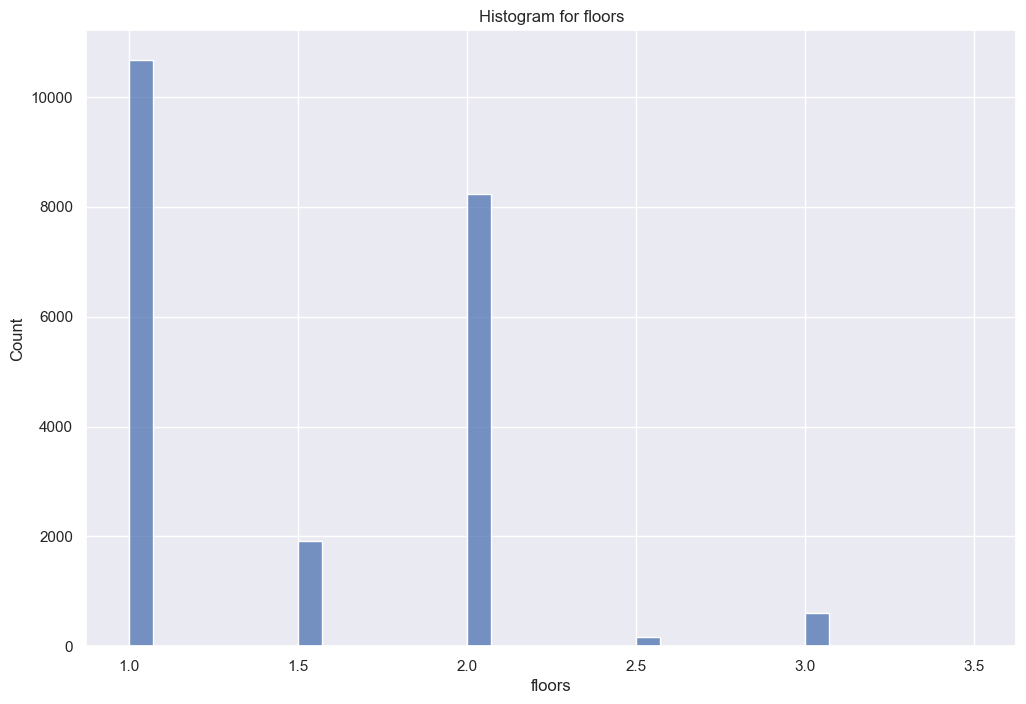

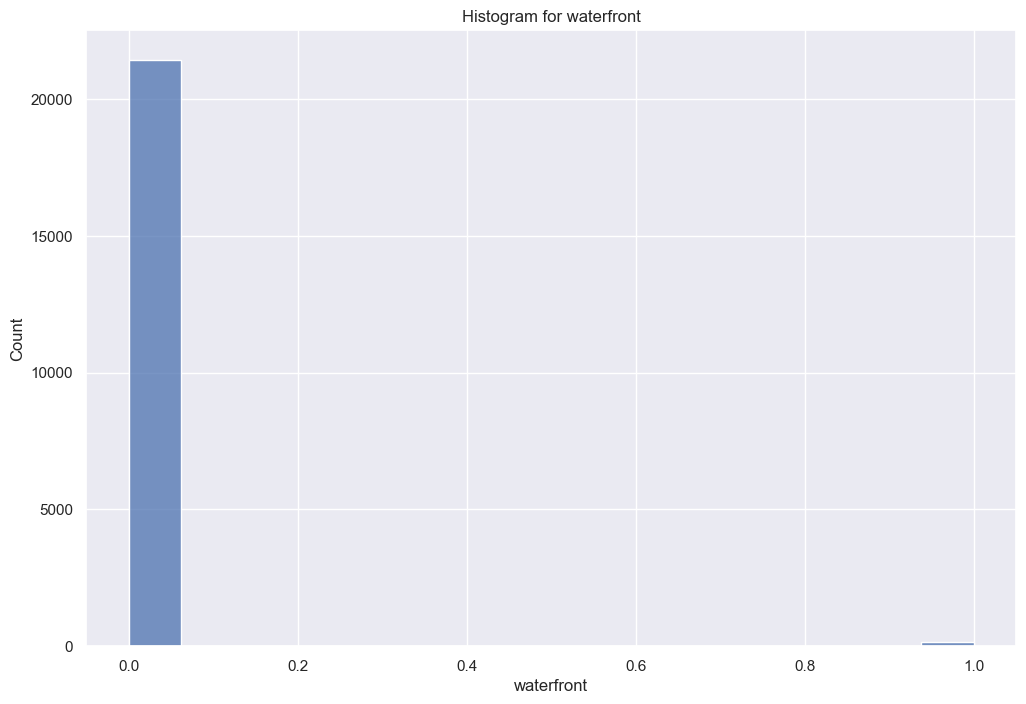

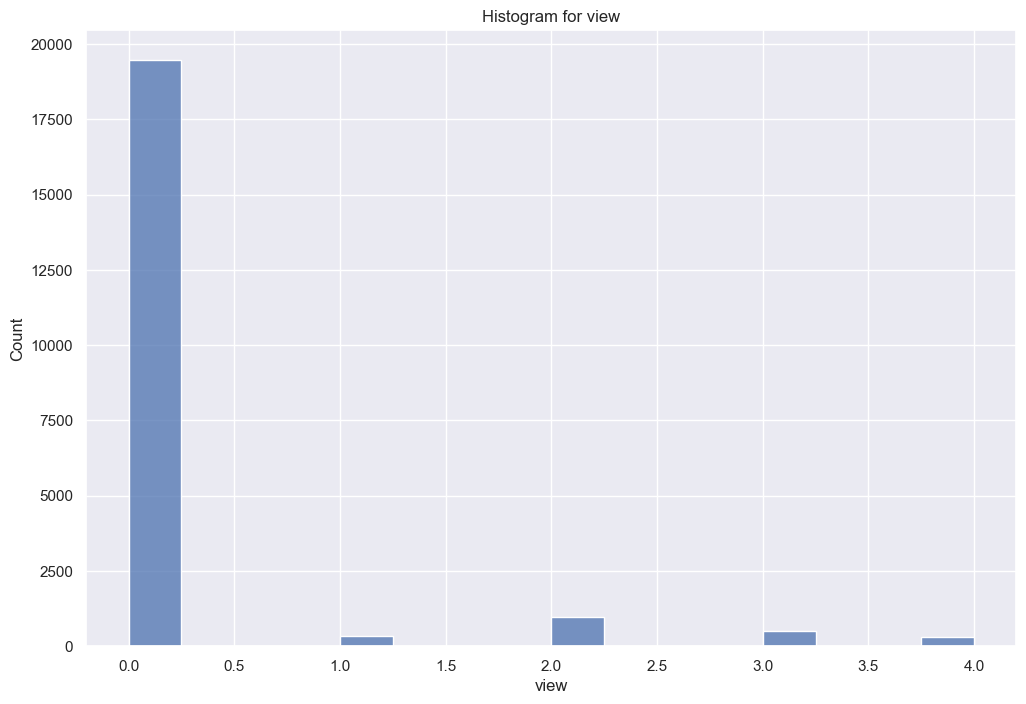

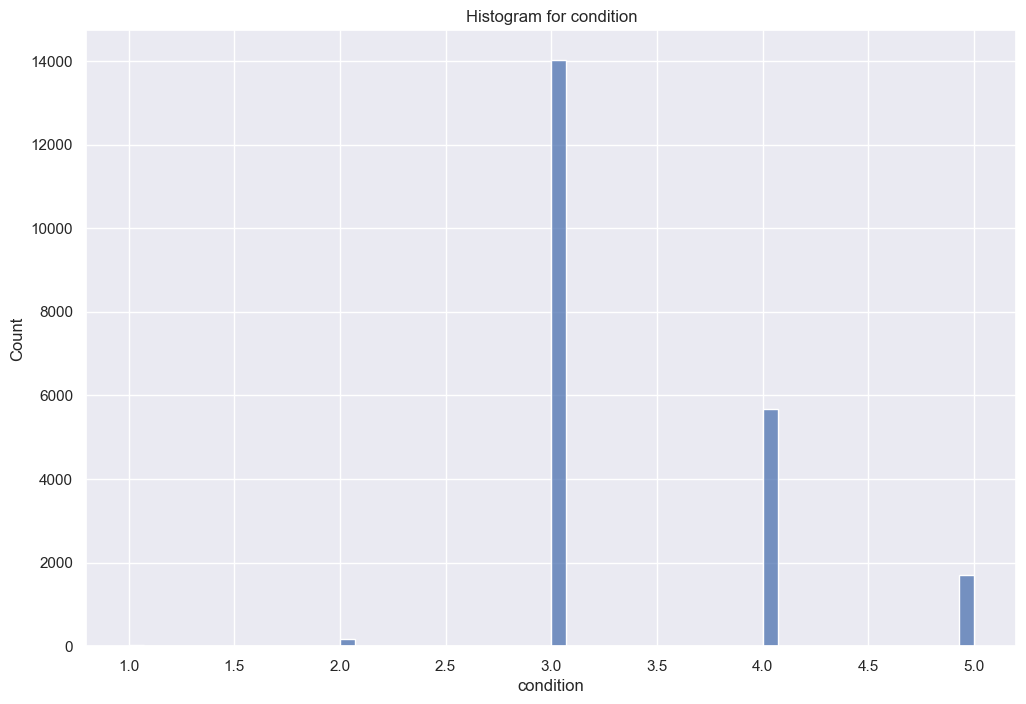

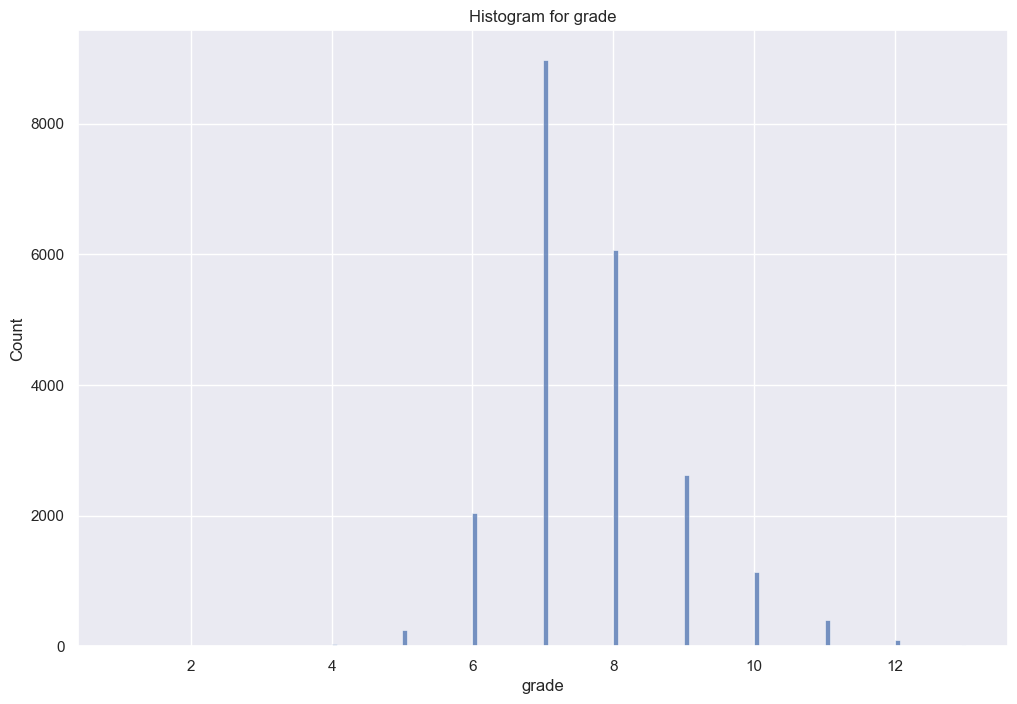

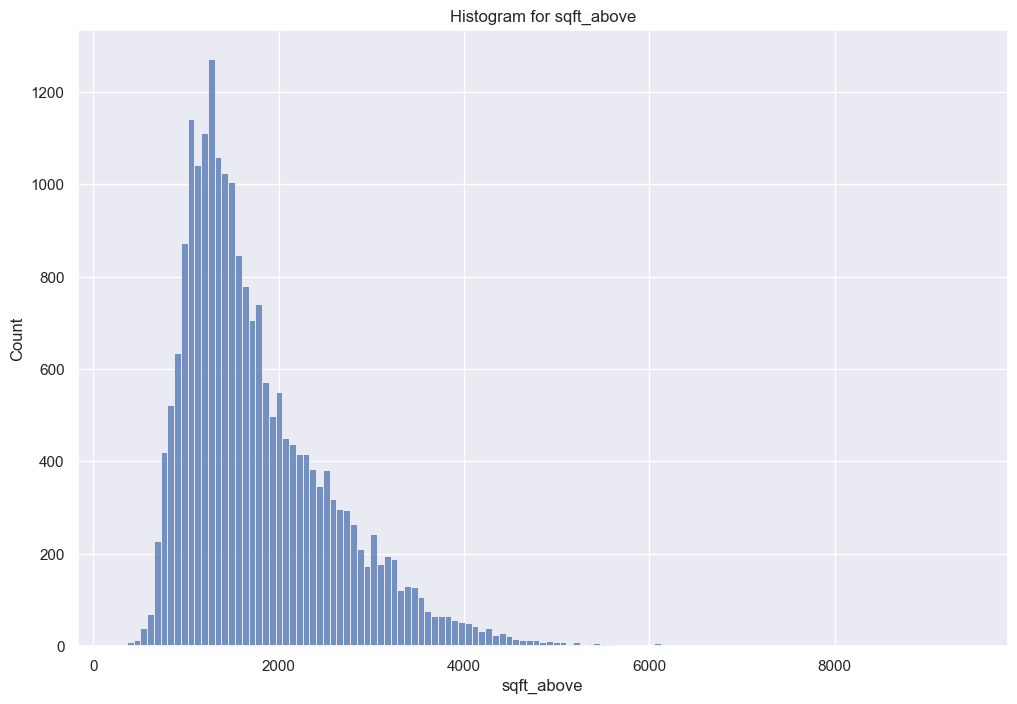

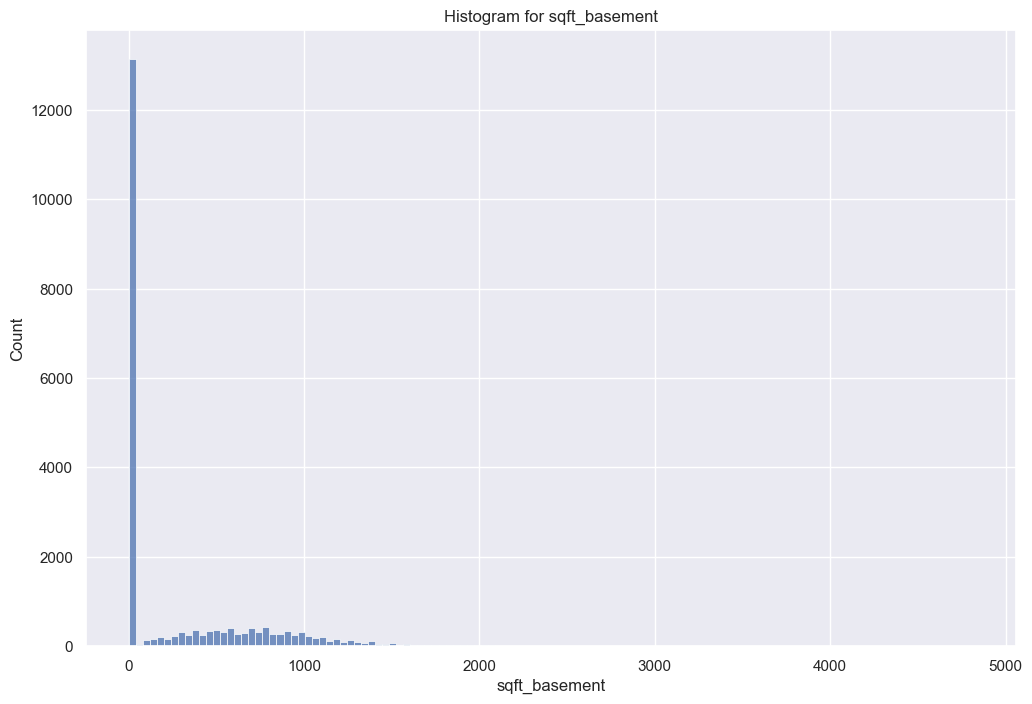

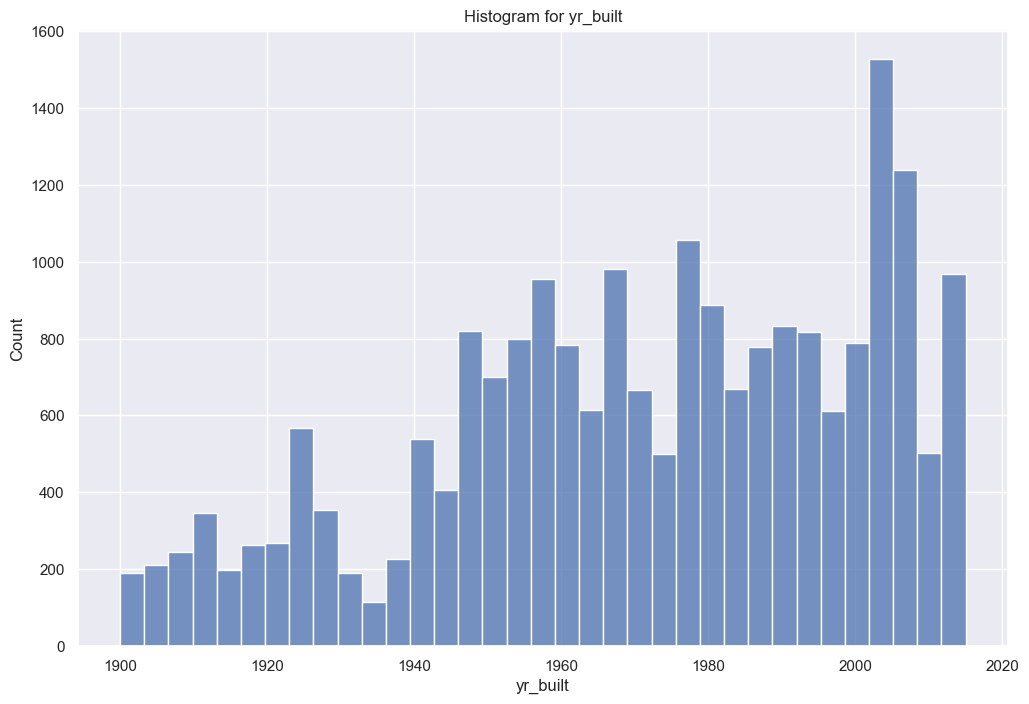

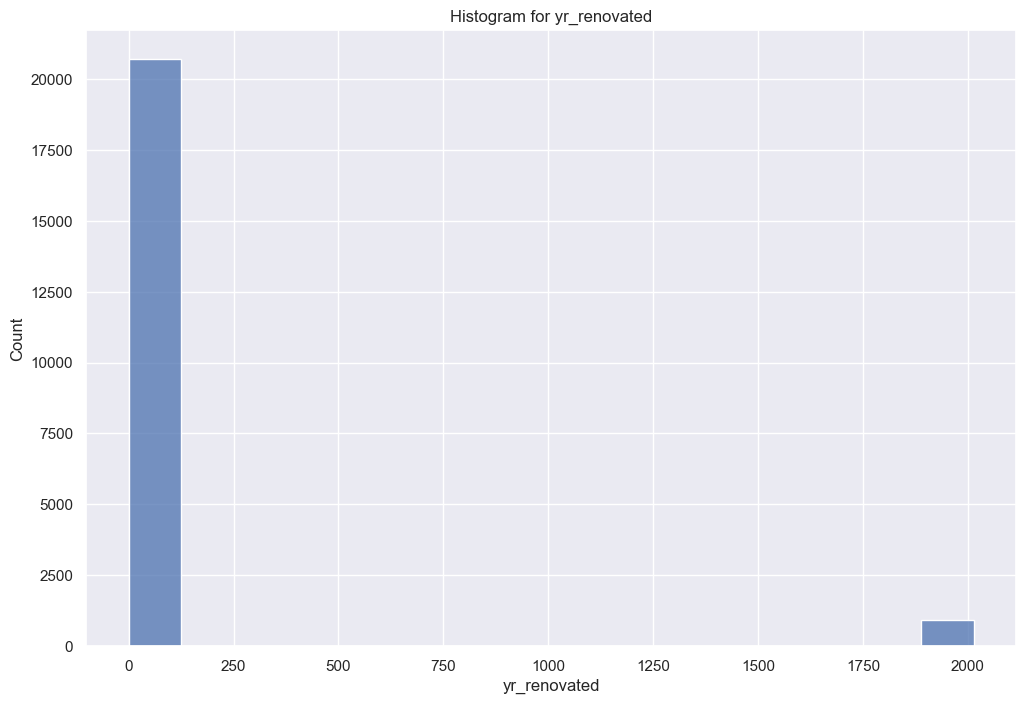

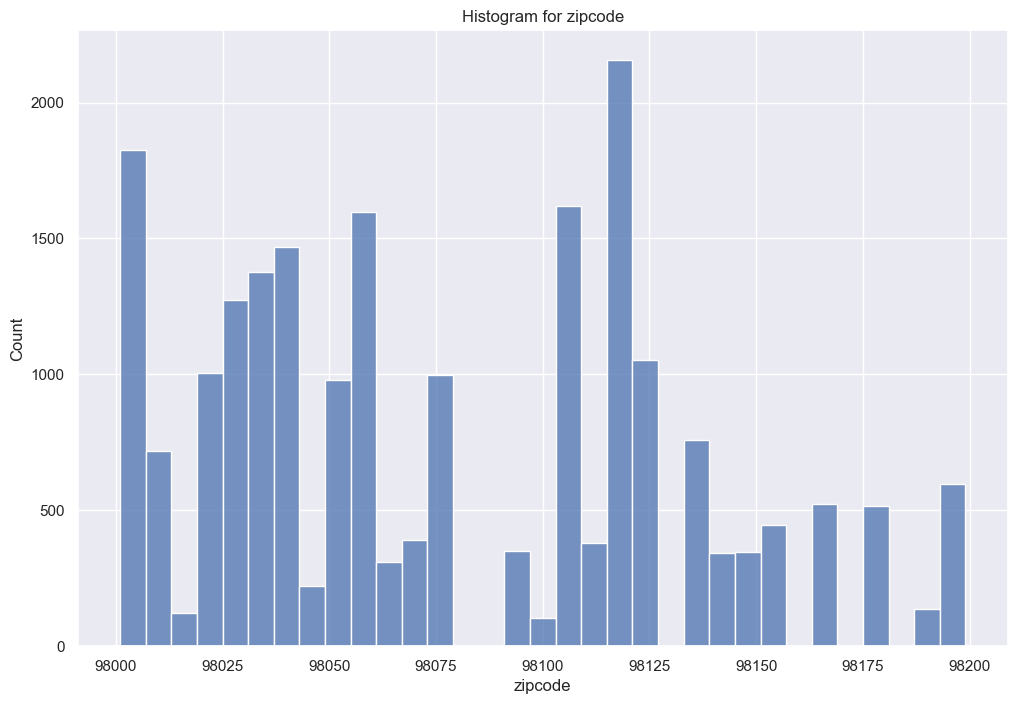

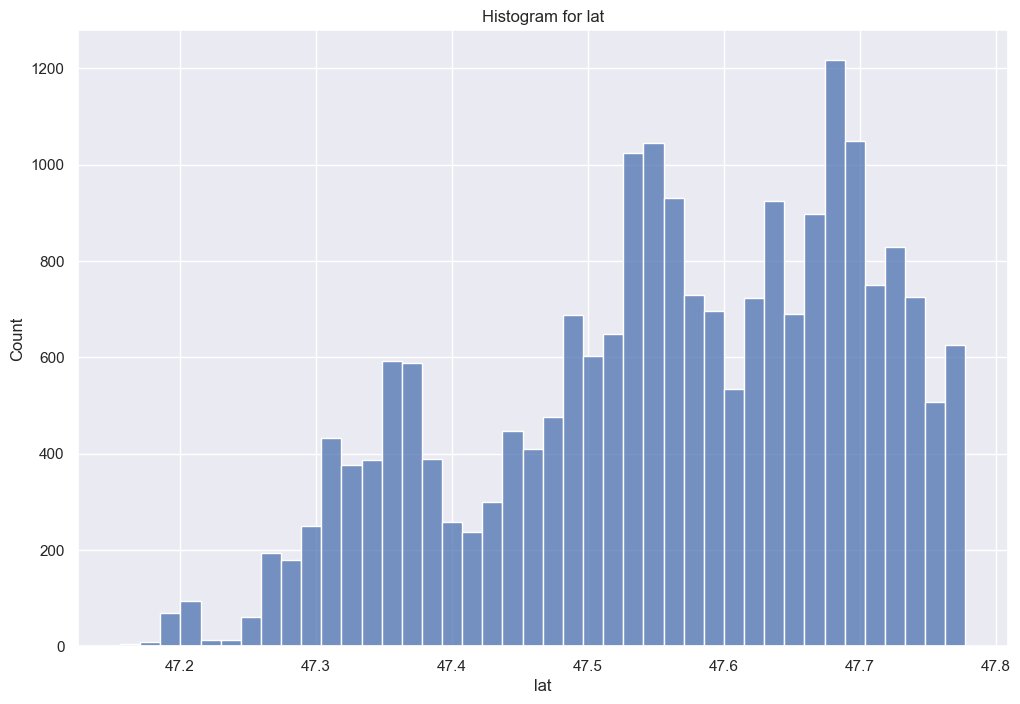

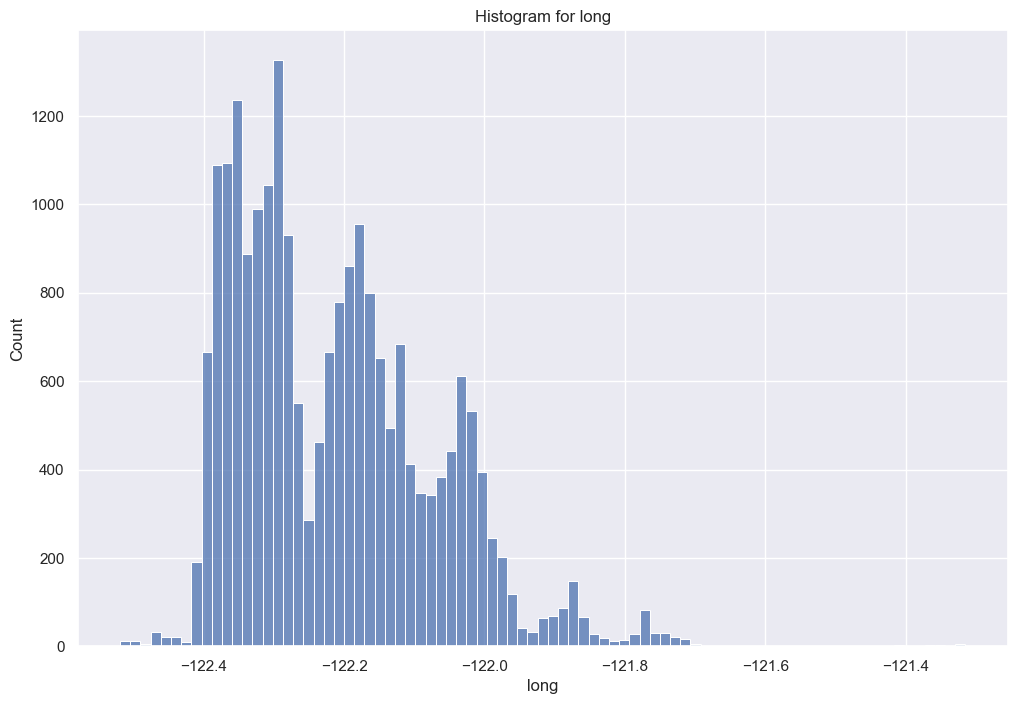

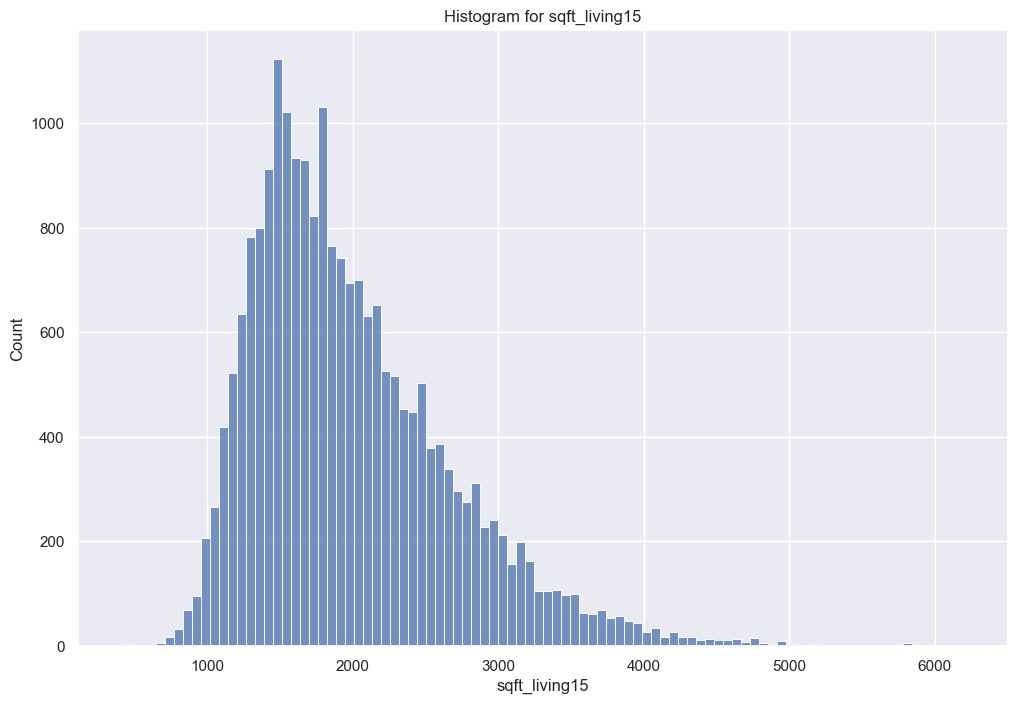

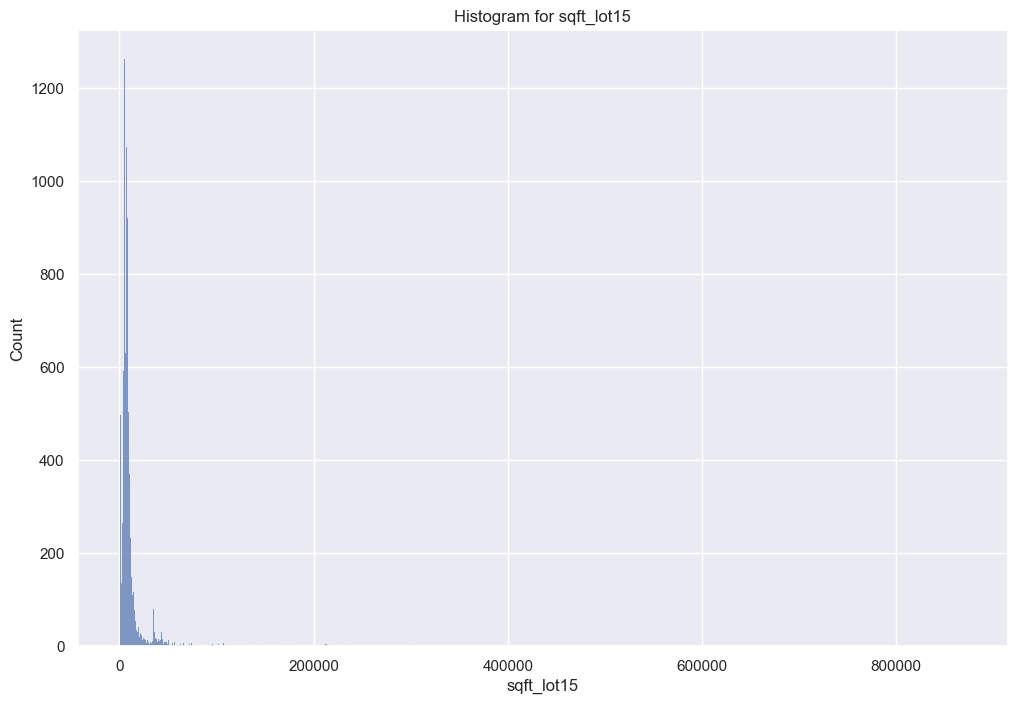

In [140]:
for column in numerical_columns:
    plt.figure(figsize=(12,8))
    sns.histplot(x=column, data=df)
    plt.title(f'Histogram for {column}')
    plt.show()

Mengecek outlier pada dataset dengan boxplot

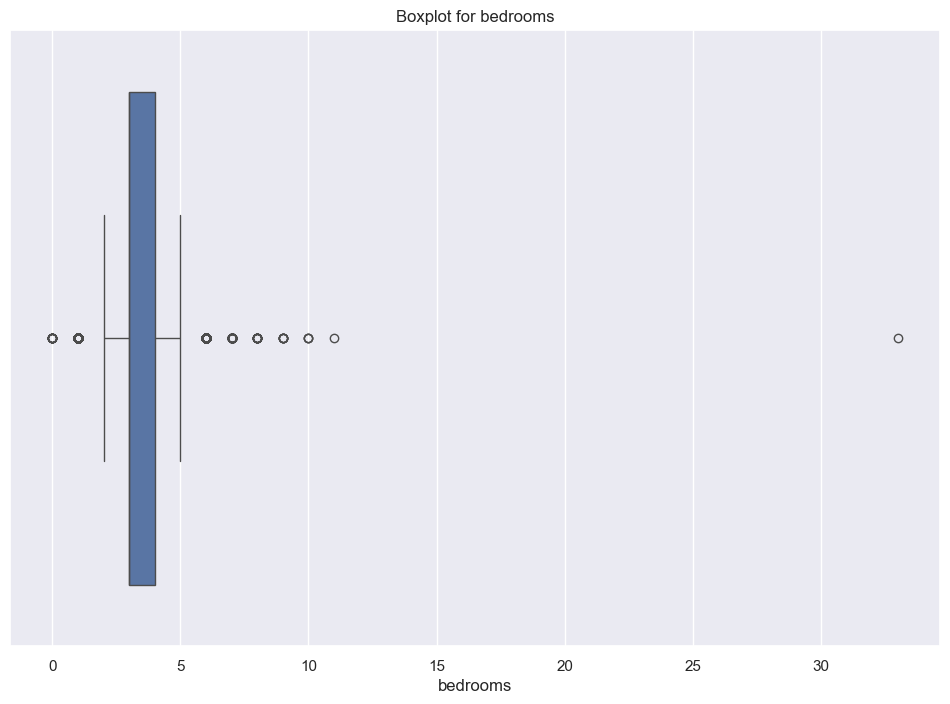

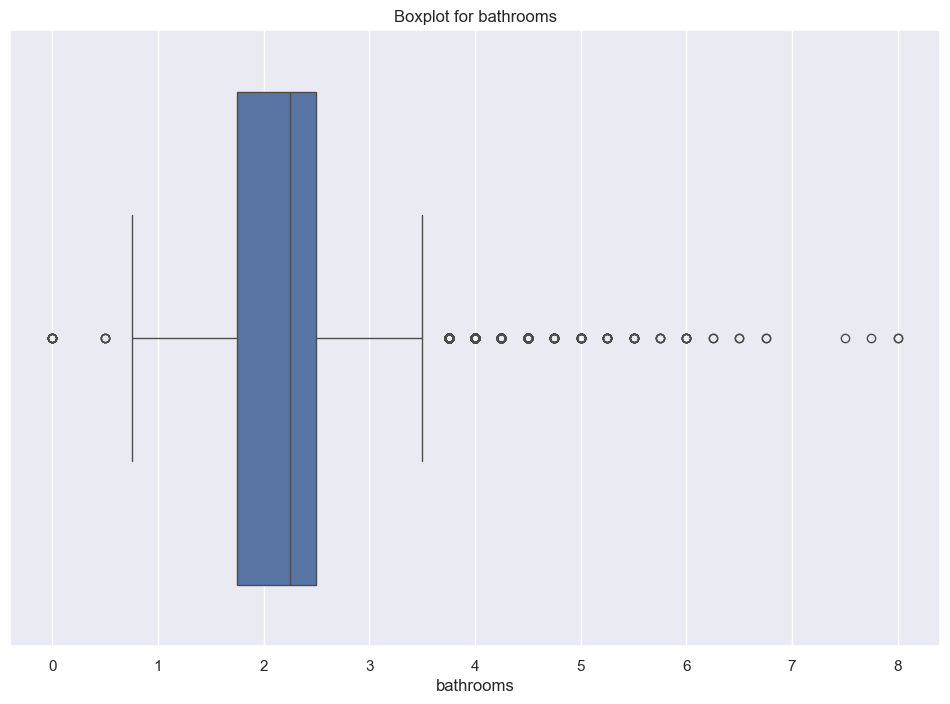

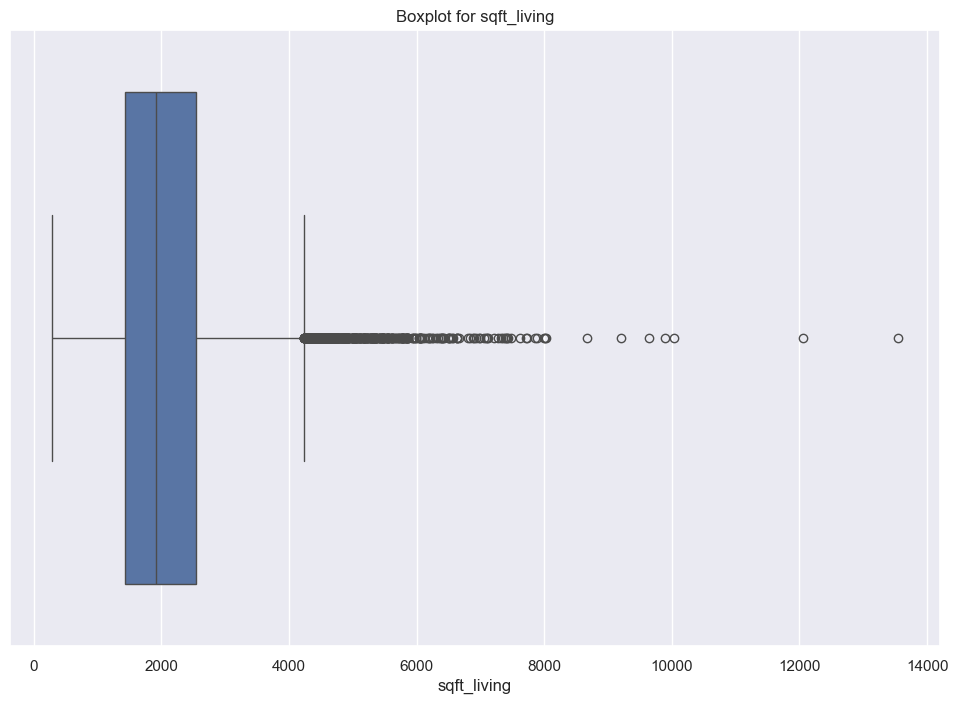

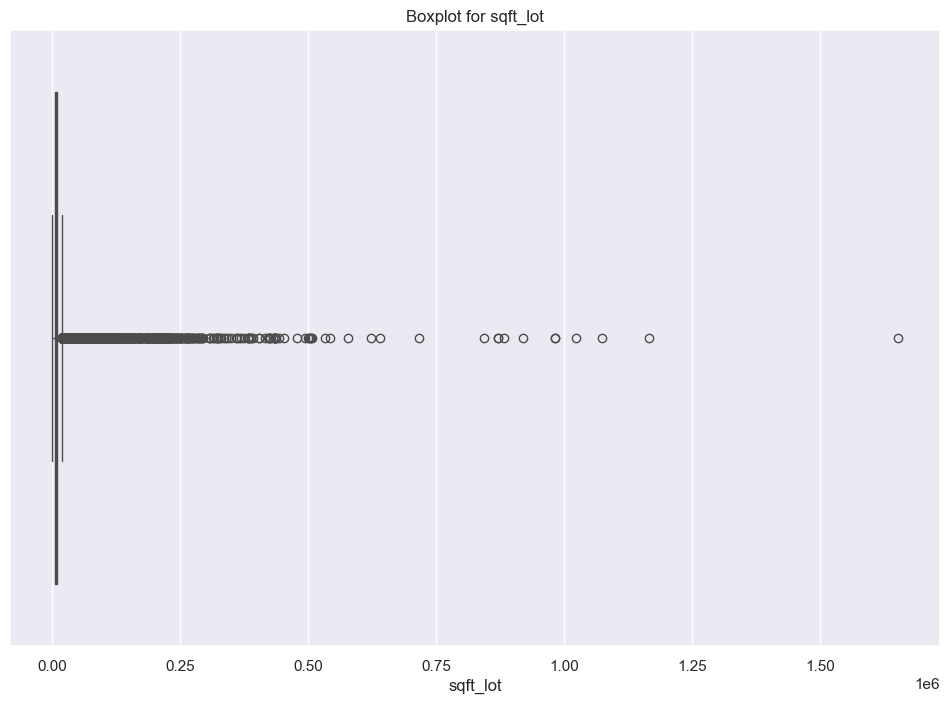

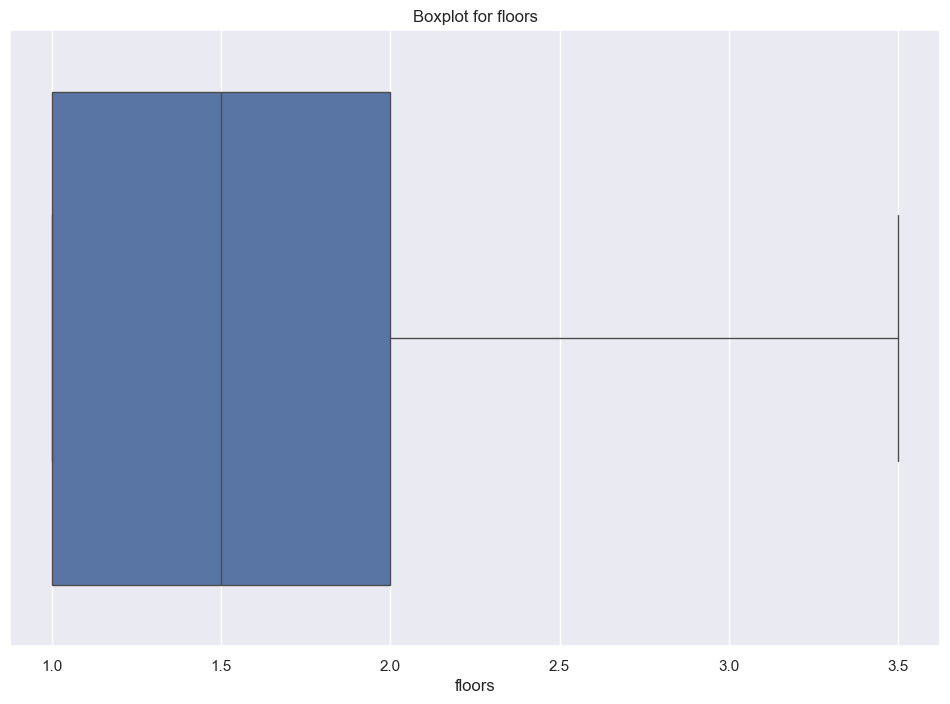

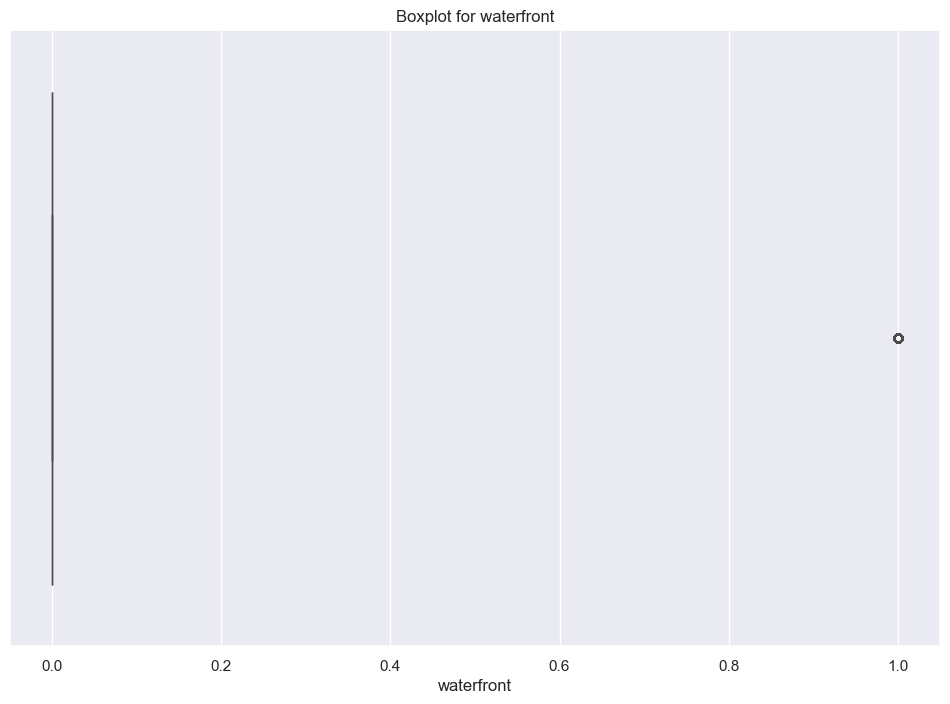

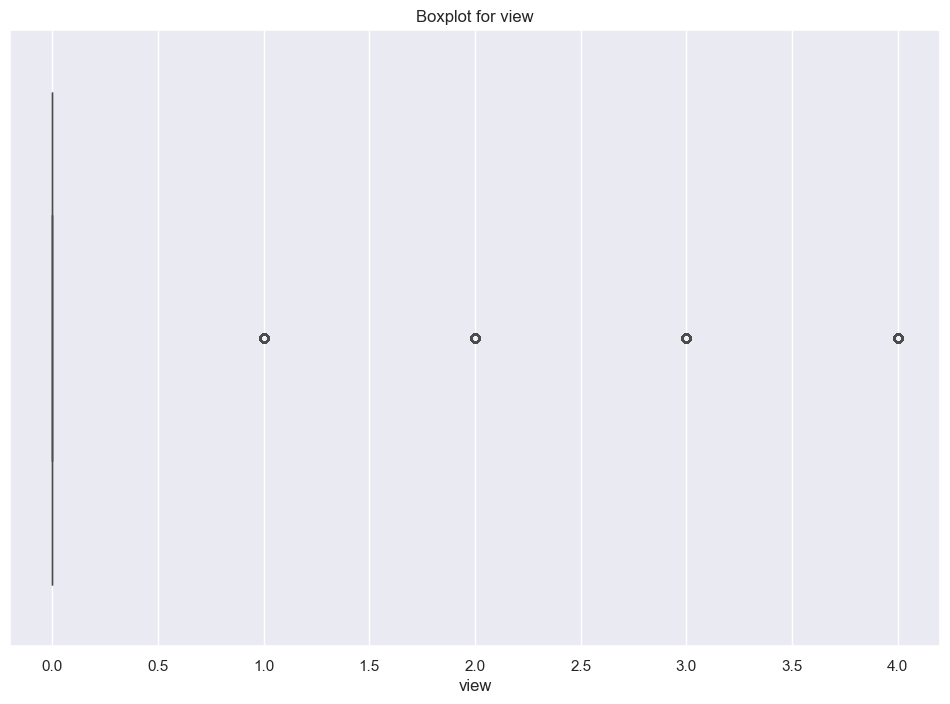

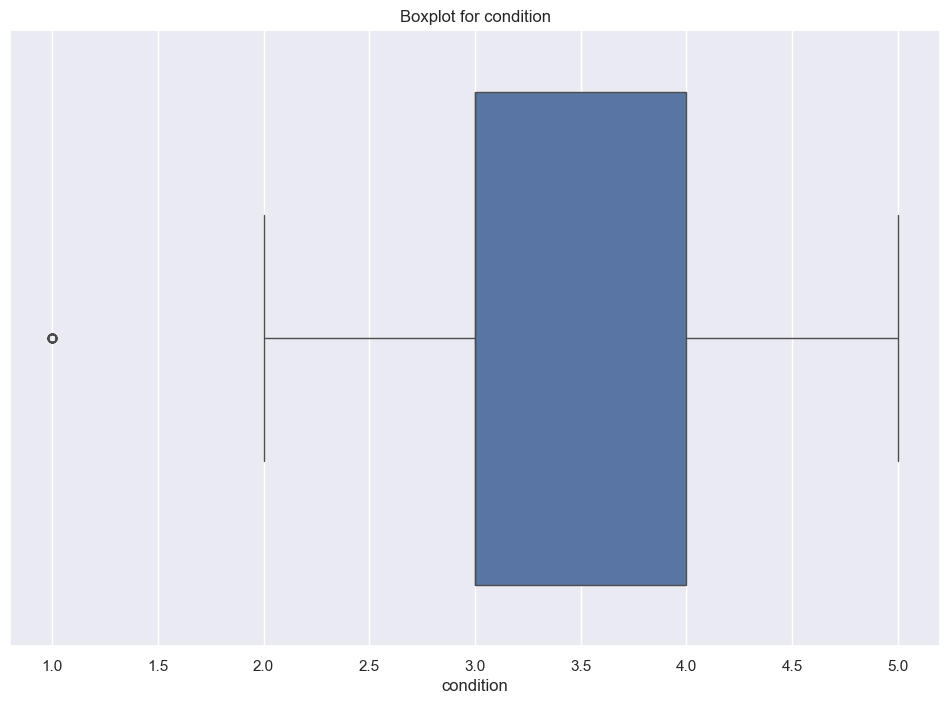

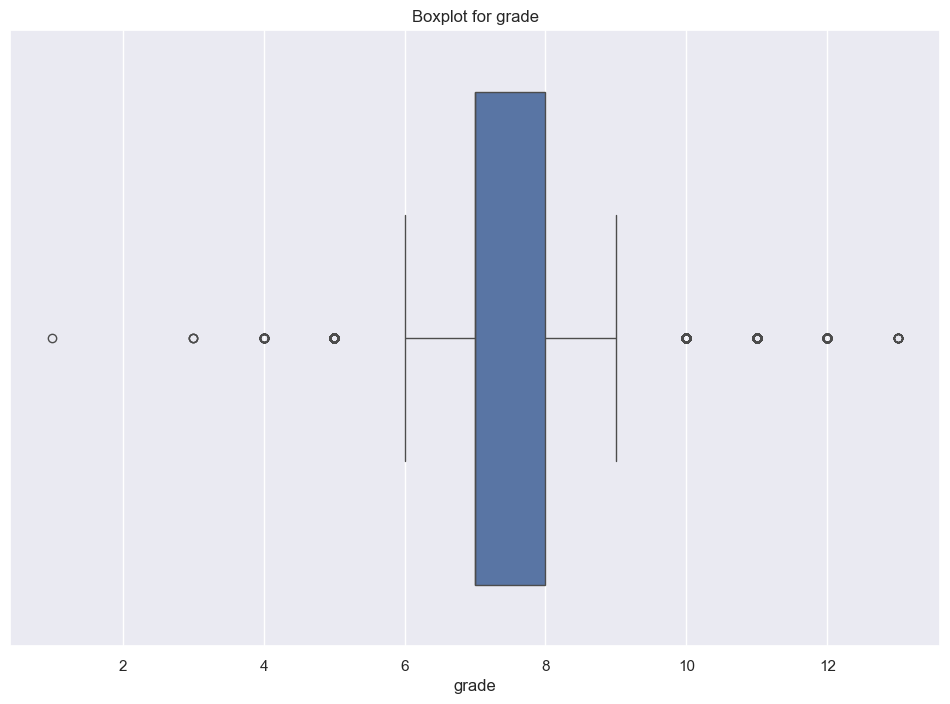

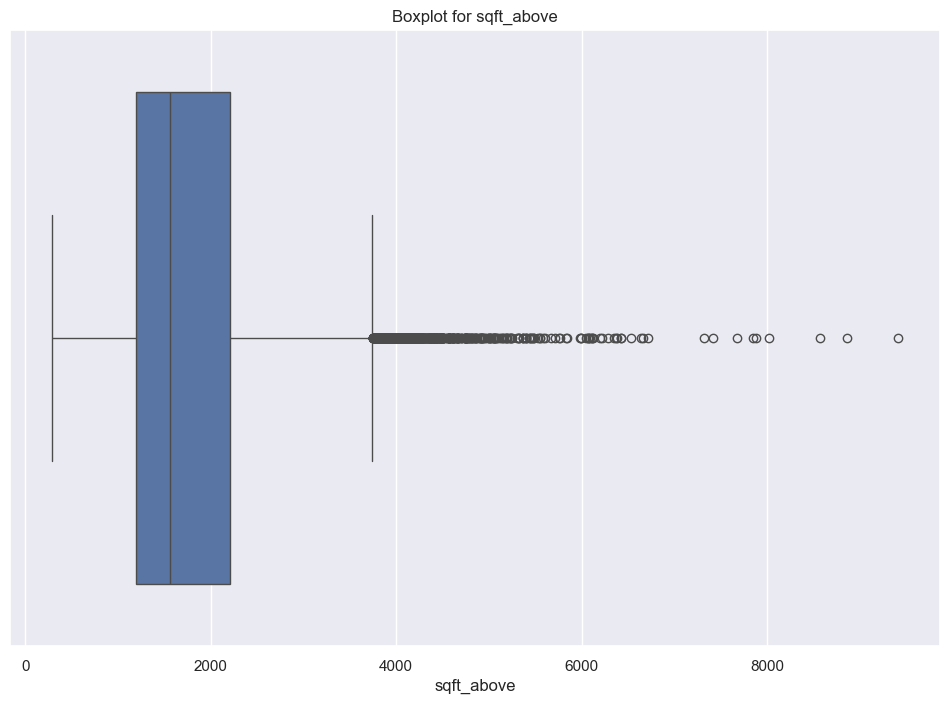

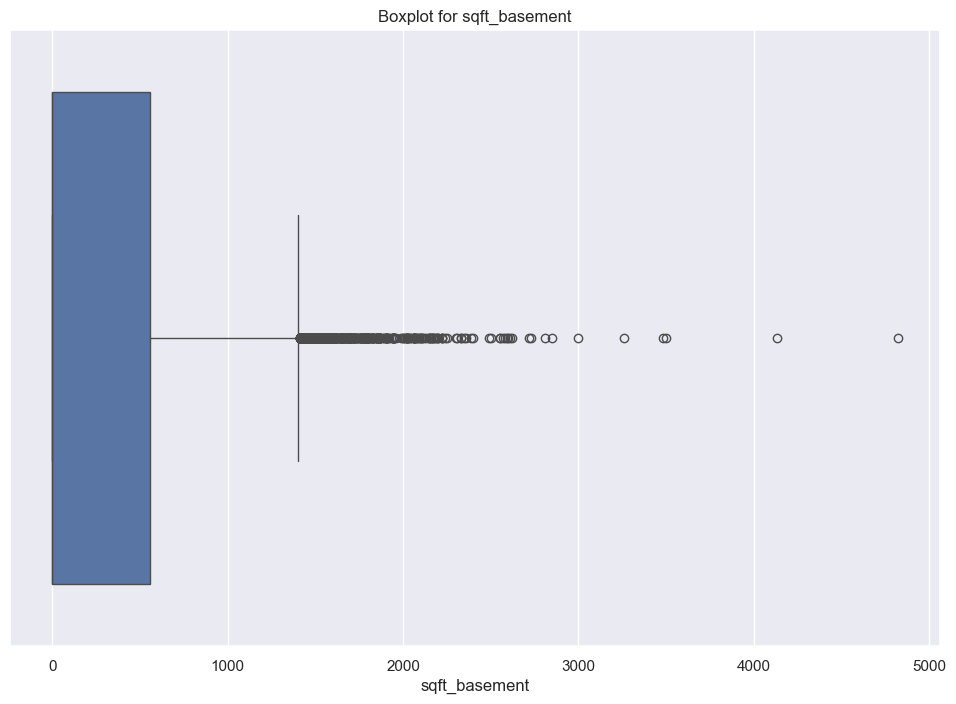

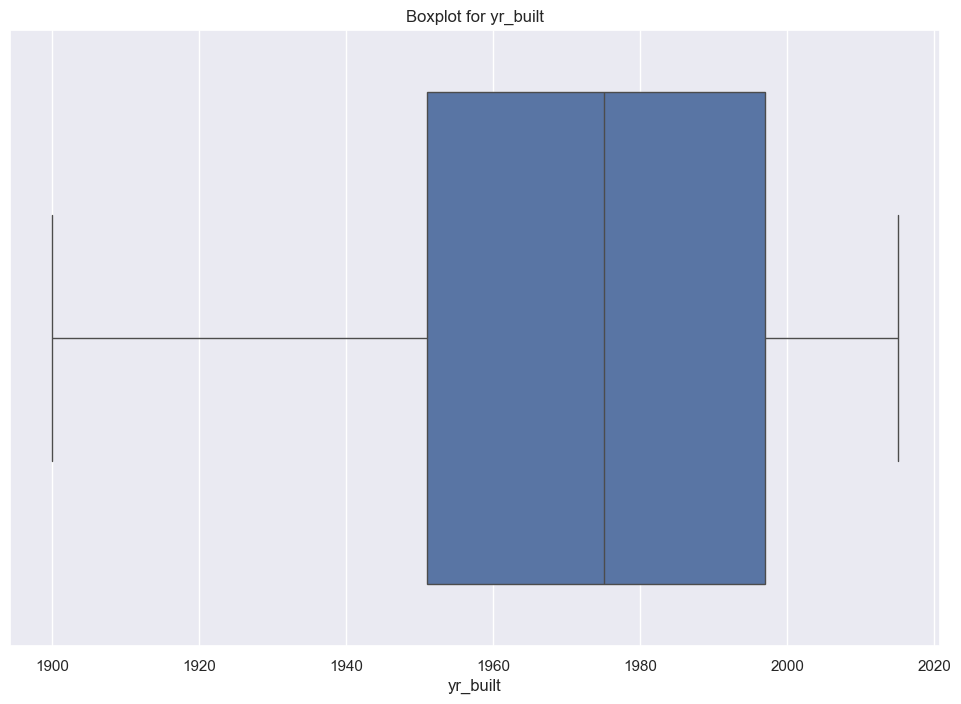

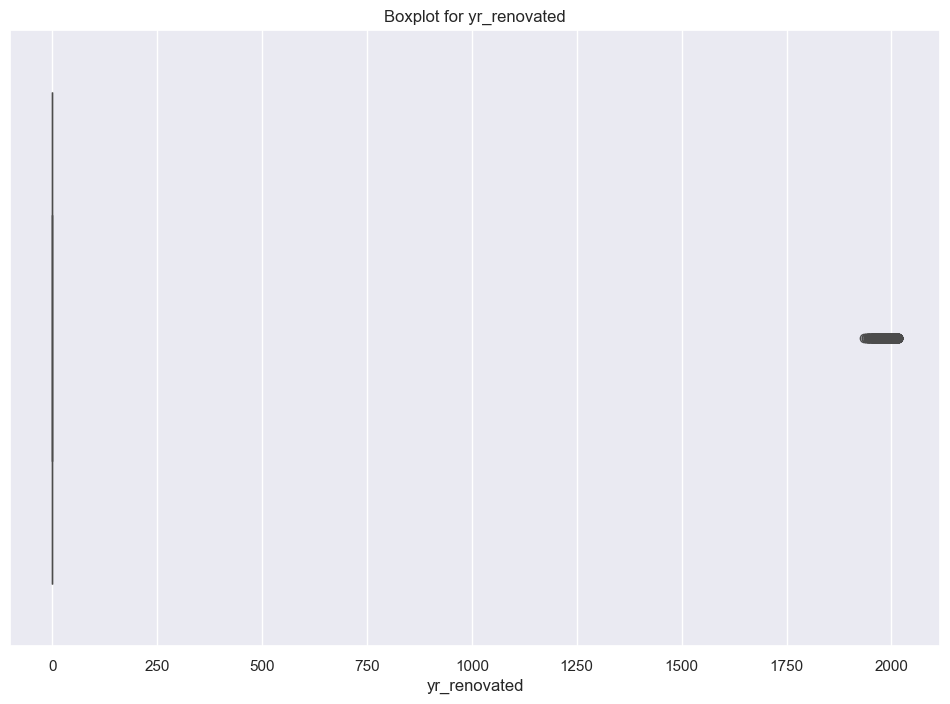

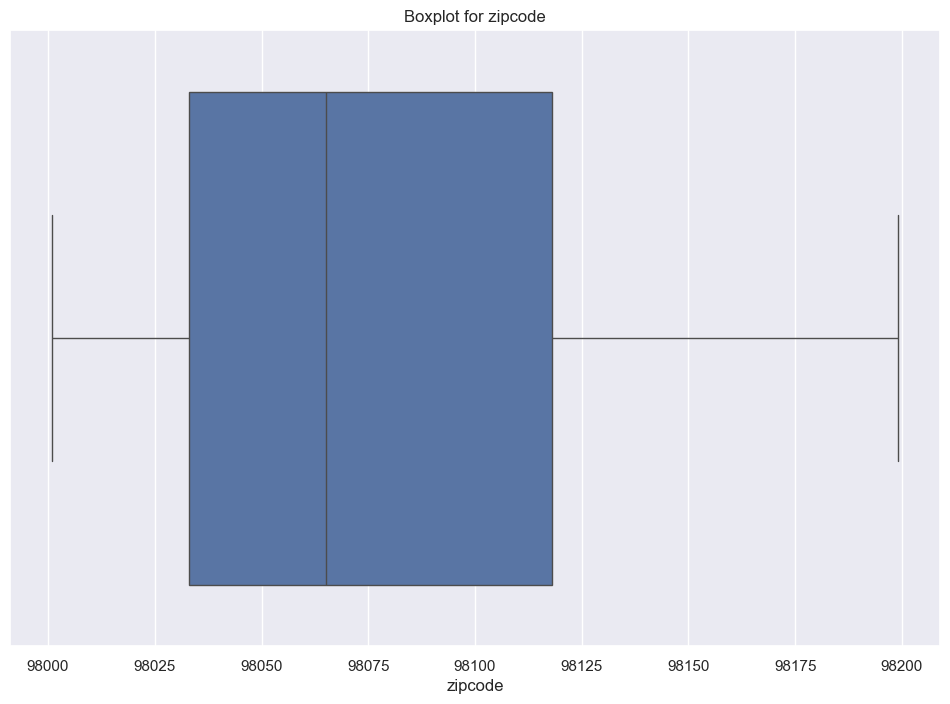

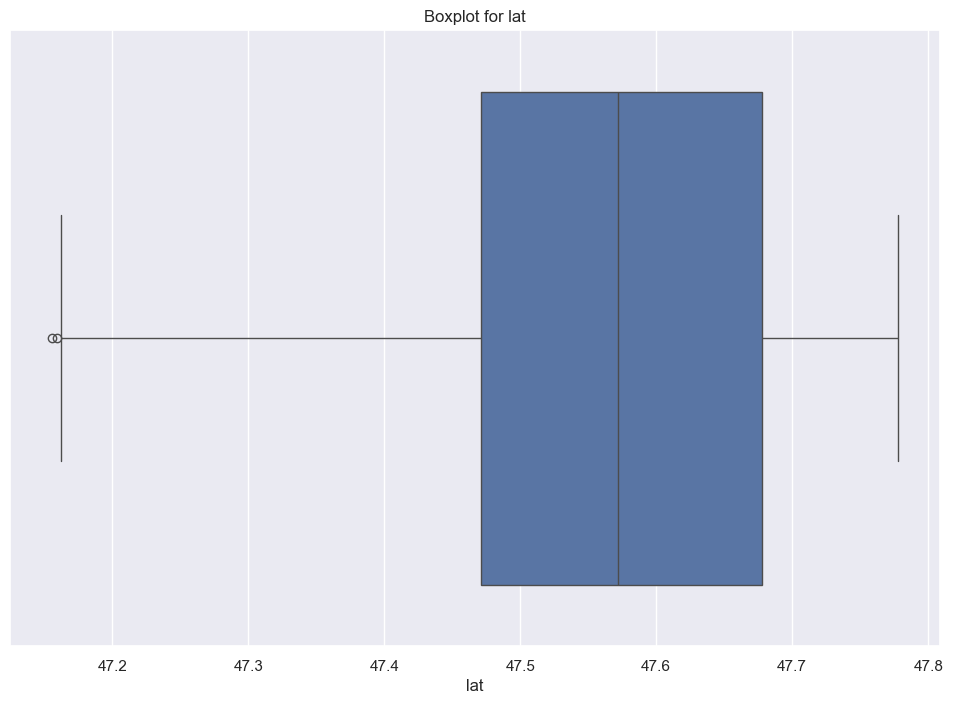

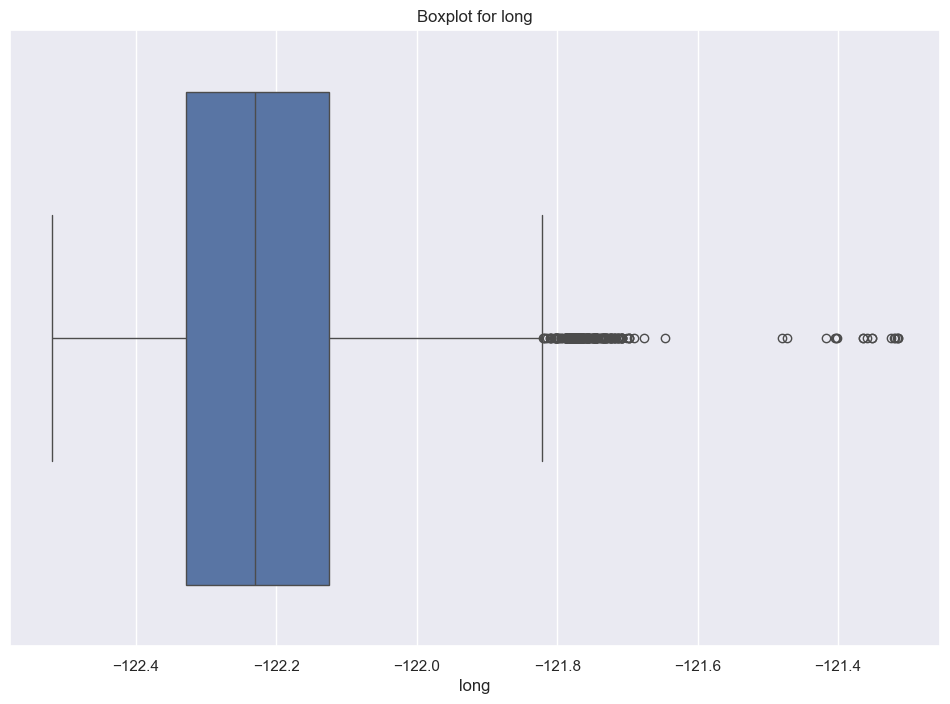

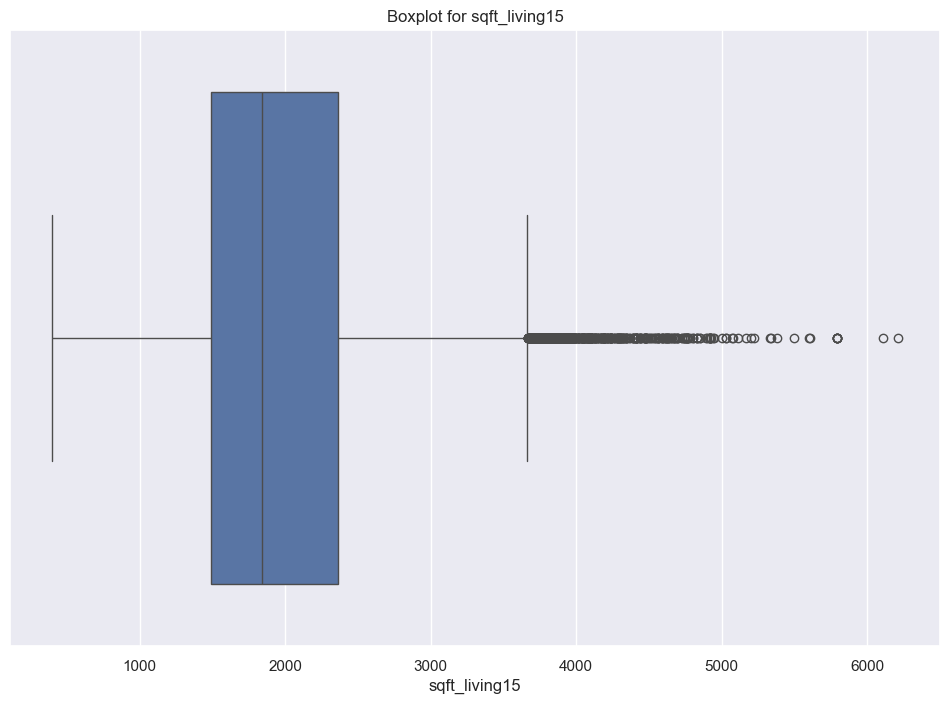

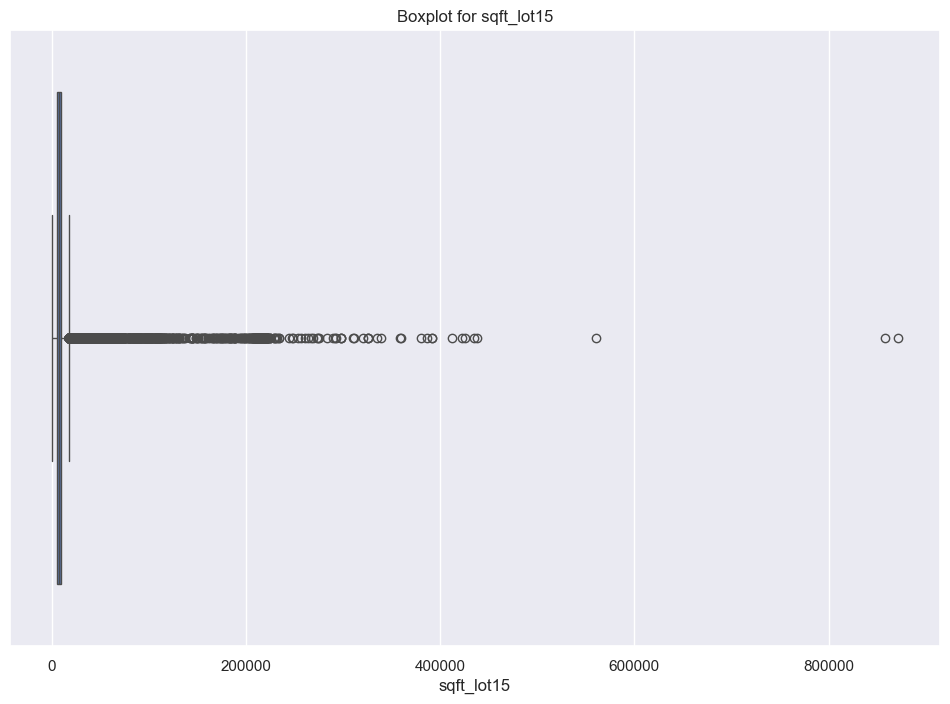

In [141]:
for column in numerical_columns:
    plt.figure(figsize=(12,8))
    sns.boxplot(x=column, data=df)
    plt.title(f'Boxplot for {column}')
    plt.show()

 mengecek korelasi antar kolom

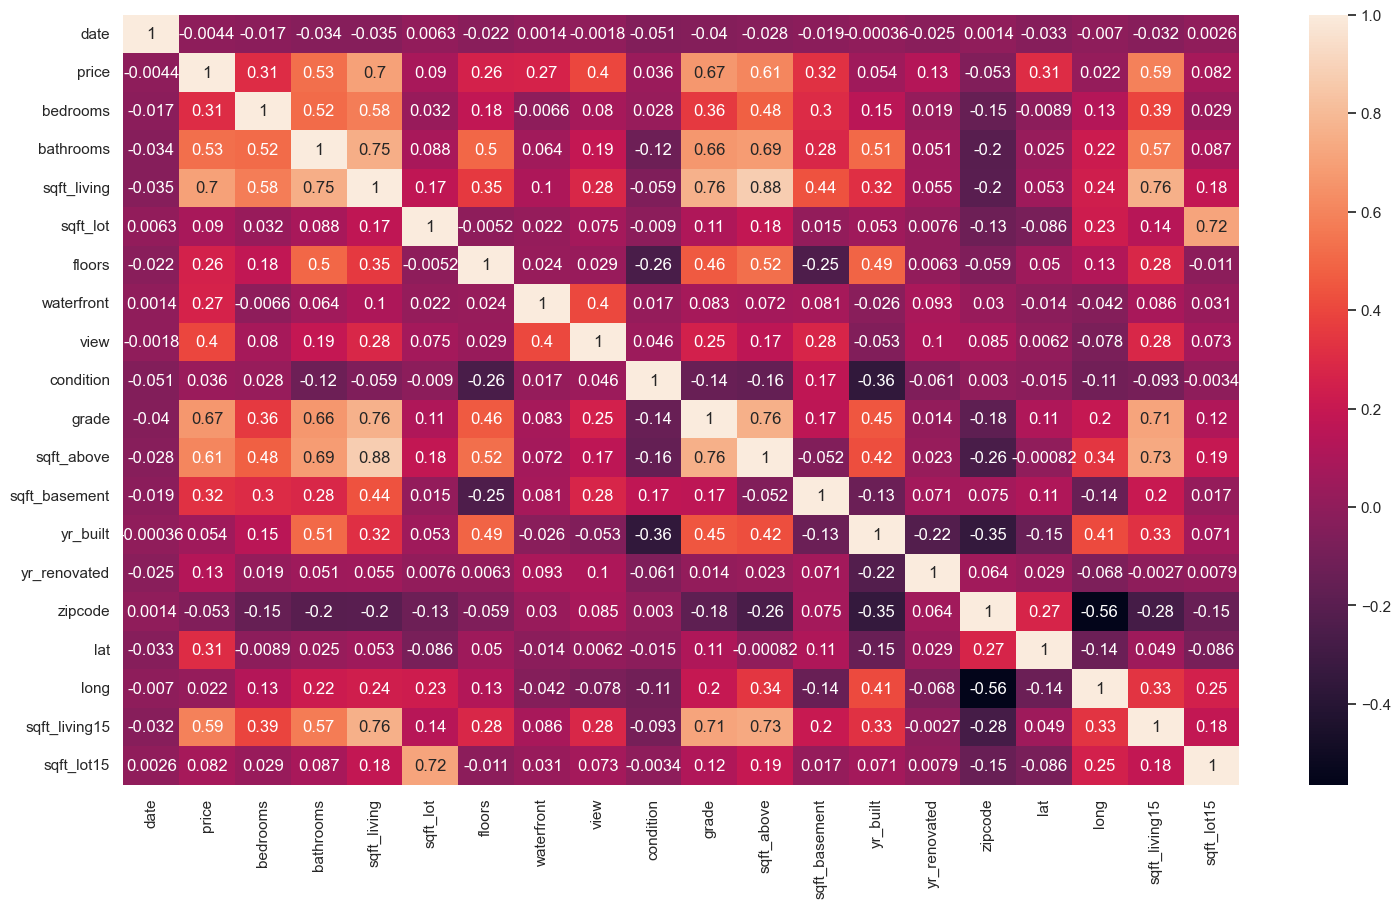

In [142]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [143]:
categorical = df[['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']]

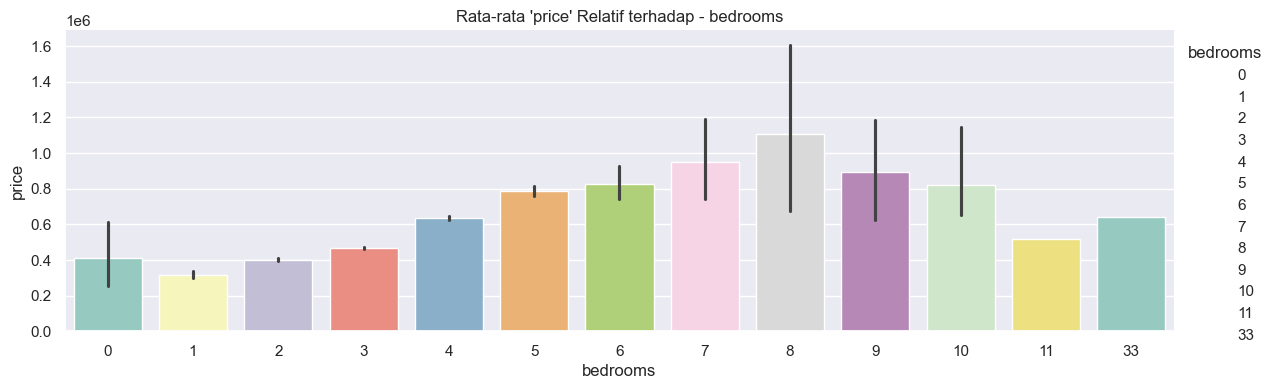

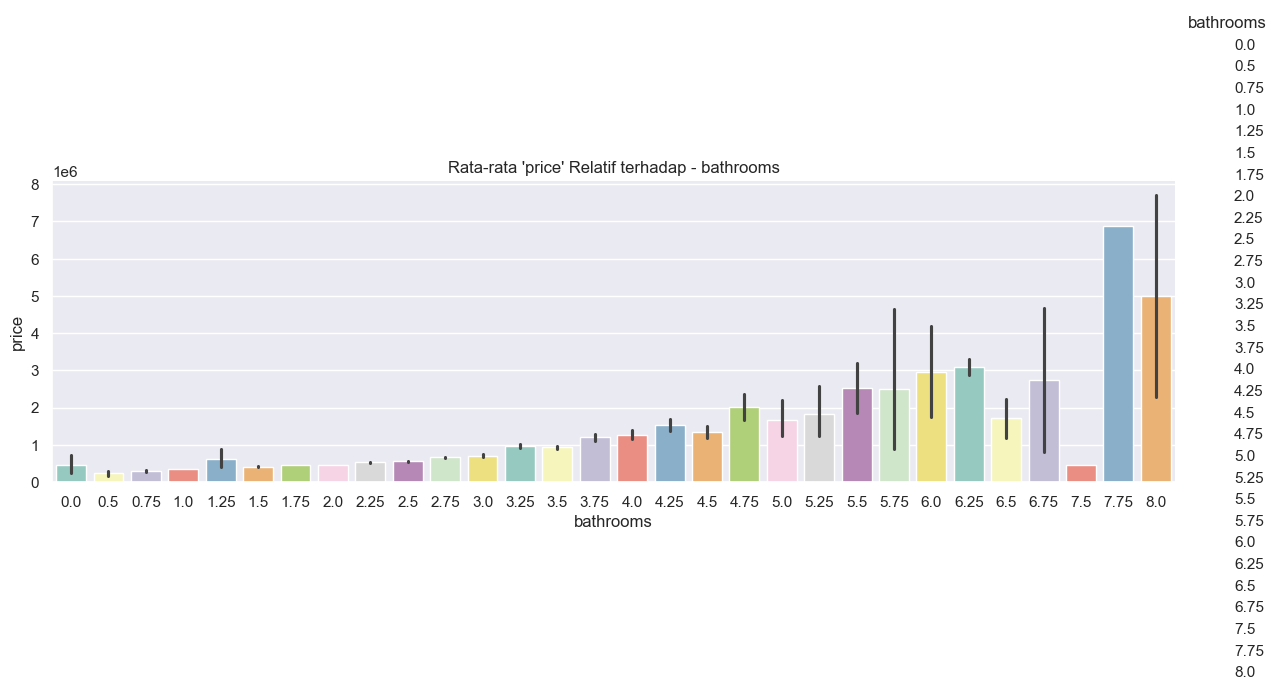

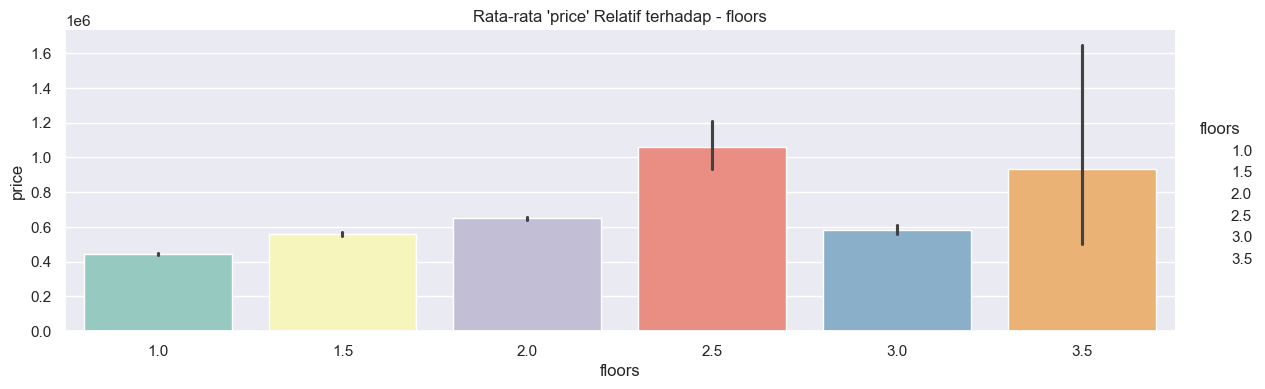

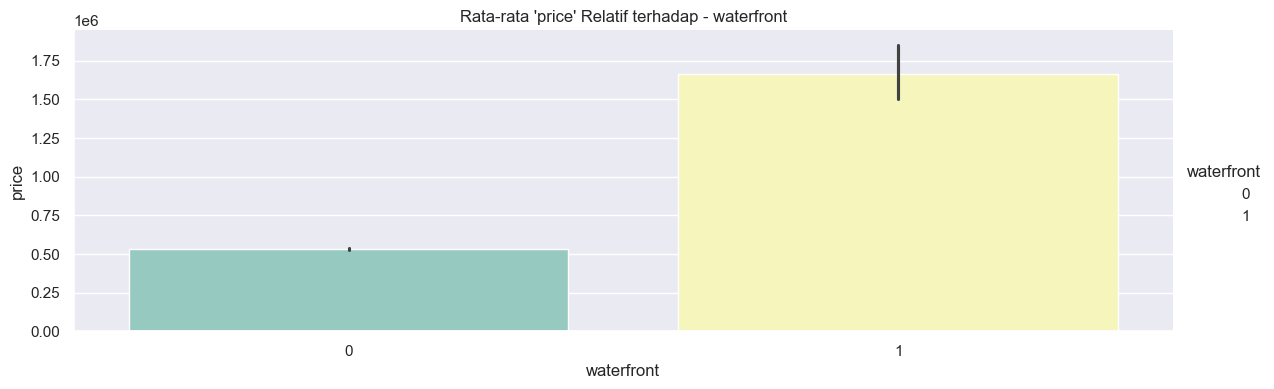

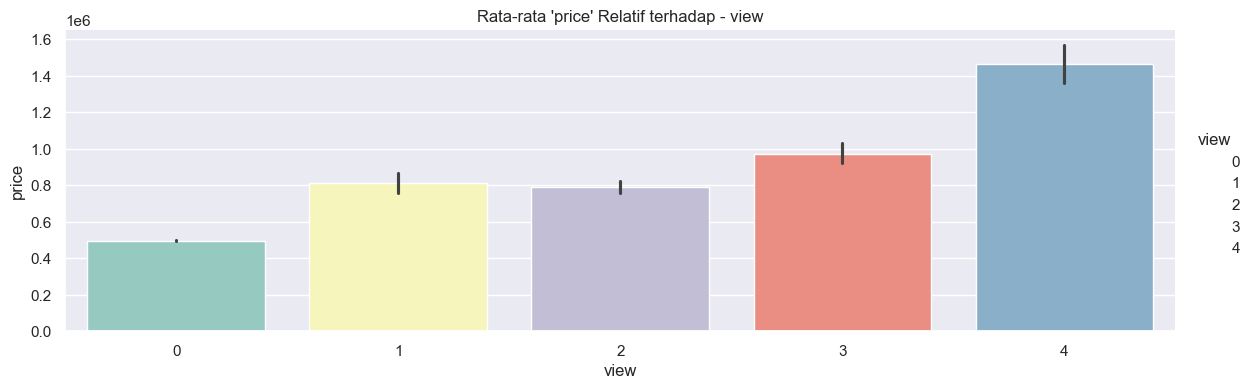

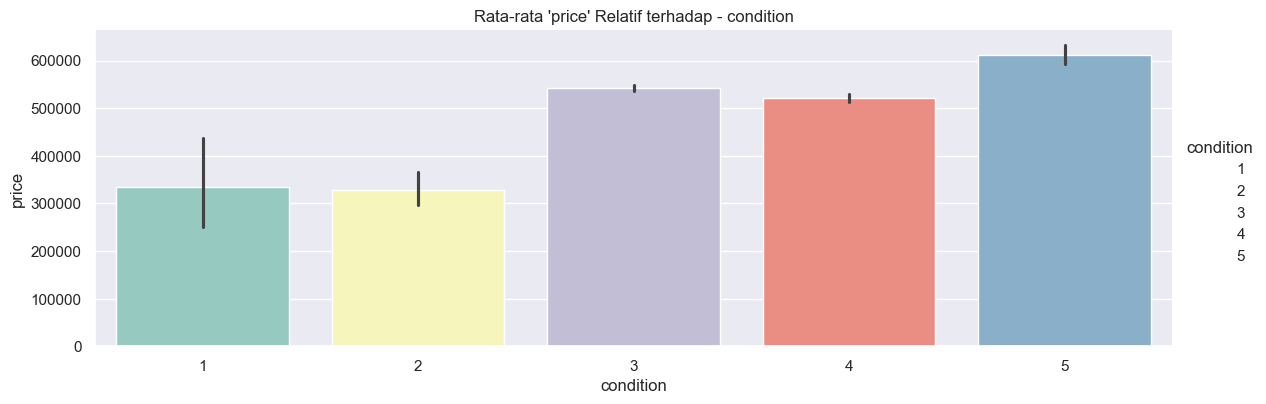

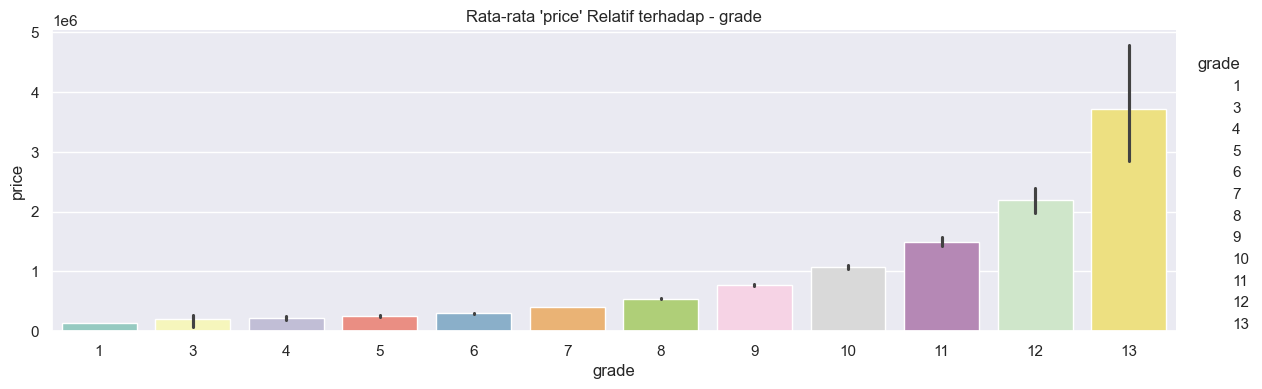

In [144]:
for col in categorical:
  sns.catplot(x=col, y="price", kind="bar", dodge=False, height = 4, aspect = 3,  data=df, palette="Set3")
  plt.title("Rata-rata 'price' Relatif terhadap - {}".format(col))

In [145]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.00,3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,2014-12-09,538000.00,3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,2015-02-25,180000.00,2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2014-12-09,604000.00,4,3.00,1960,5000,1.00,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,2015-02-18,510000.00,3,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


# Modelling

In [146]:
X = df.drop(['price', 'date'], axis=1)
y = df['price']

In [147]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,4,3.00,1960,5000,1.00,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,3,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.00,0,0,3,8,1530,0,2009,0,98103,47.70,-122.35,1530,1509
21609,4,2.50,2310,5813,2.00,0,0,3,8,2310,0,2014,0,98146,47.51,-122.36,1830,7200
21610,2,0.75,1020,1350,2.00,0,0,3,7,1020,0,2009,0,98144,47.59,-122.30,1020,2007
21611,3,2.50,1600,2388,2.00,0,0,3,8,1600,0,2004,0,98027,47.53,-122.07,1410,1287


In [148]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = RobustScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
# Print according to the expected result
print('Jumlah baris dan kolom dari x_train adalah: \n', X_train.shape, ' \nSedangkan Jumlah baris dan kolom dari y_train adalah: \n', y_train.shape)
print('Jumlah baris dan kolom dari x_test adalah: \n', X_test.shape,'\nSedangkan Jumlah baris dan kolom dari y_test adalah: \n', y_test.shape)

Jumlah baris dan kolom dari x_train adalah: 
 (17290, 18)  
Sedangkan Jumlah baris dan kolom dari y_train adalah: 
 (17290,)
Jumlah baris dan kolom dari x_test adalah: 
 (4323, 18) 
Sedangkan Jumlah baris dan kolom dari y_test adalah: 
 (4323,)


In [149]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import HistGradientBoostingRegressor, RandomForestRegressor, BaggingRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
import math
def evaluate(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_all = model.predict(X)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    rmse = math.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2:', r2)

    plt.scatter(y_test, y_pred, color='blue', label='True Values')
    plt.scatter(y_pred, y_test, color='red', label='Predictions')
    plt.xlabel('Data Points')
    plt.ylabel('Values')
    plt.title('True Values vs Predictions')
    plt.legend()
    plt.show()

    df_comparison = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
    print(df_comparison)

MAE: 71751.3801595391
MSE: 21901612668.60277
RMSE: 147991.93447145278
R2: 0.8551257509067212


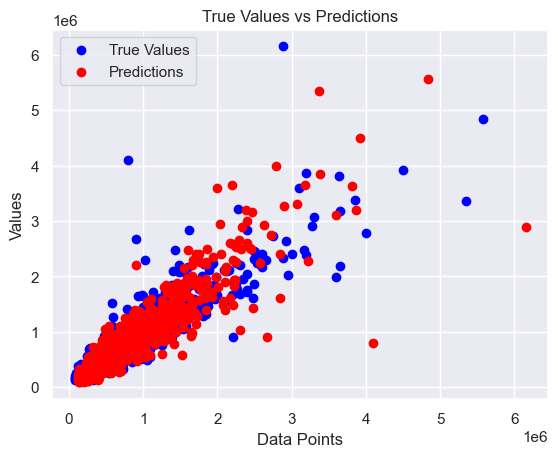

          y_test     y_pred
735    365000.00  395654.66
2830   865000.00 1011555.19
4106  1038000.00 1241970.88
16218 1490000.00 2074387.00
19964  711000.00  756491.50
...          ...        ...
13674  338000.00  345381.47
20377  673000.00  725237.62
8805   285000.00  307769.59
10168  605000.00  579344.69
2522   356500.00  341324.41

[4323 rows x 2 columns]


In [150]:
evaluate(XGBRegressor())

MAE: 73674.82946796206
MSE: 23963911220.209606
RMSE: 154802.81399318815
R2: 0.8414841091431216


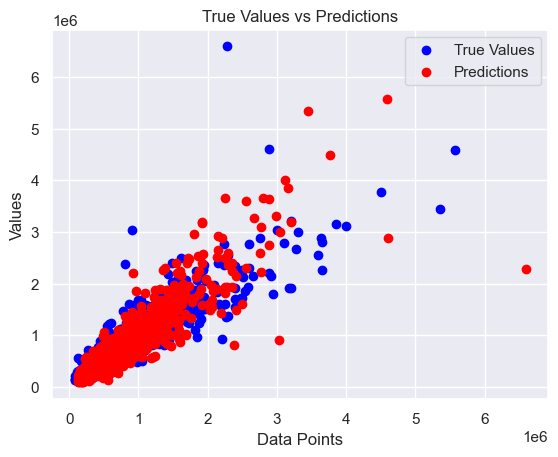

          y_test     y_pred
735    365000.00  380466.16
2830   865000.00  823614.00
4106  1038000.00 1053185.50
16218 1490000.00 2031676.50
19964  711000.00  715033.71
...          ...        ...
13674  338000.00  339552.88
20377  673000.00  671199.25
8805   285000.00  288092.20
10168  605000.00  620802.48
2522   356500.00  338528.89

[4323 rows x 2 columns]


In [151]:
evaluate(ExtraTreesRegressor())

MAE: 78264.44497262704
MSE: 27149554289.00596
RMSE: 164771.21802367657
R2: 0.820411795681351


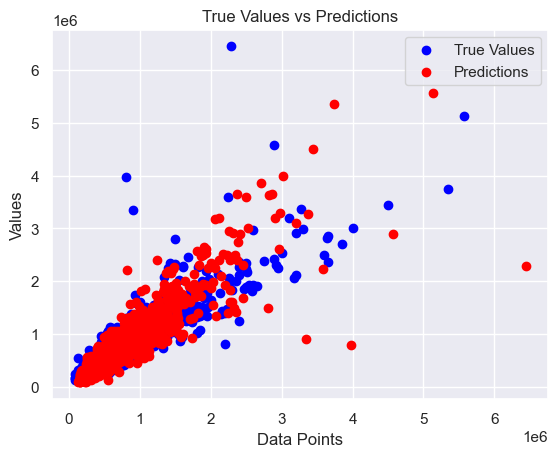

          y_test     y_pred
735    365000.00  380900.00
2830   865000.00  915825.00
4106  1038000.00 1034770.00
16218 1490000.00 2320845.00
19964  711000.00  700200.00
...          ...        ...
13674  338000.00  321300.00
20377  673000.00  729495.00
8805   285000.00  281400.00
10168  605000.00  605045.00
2522   356500.00  343419.00

[4323 rows x 2 columns]


In [152]:
evaluate(BaggingRegressor())

MAE: 69846.6404660181
MSE: 17659142662.210205
RMSE: 132887.70696422676
R2: 0.8831887372163084


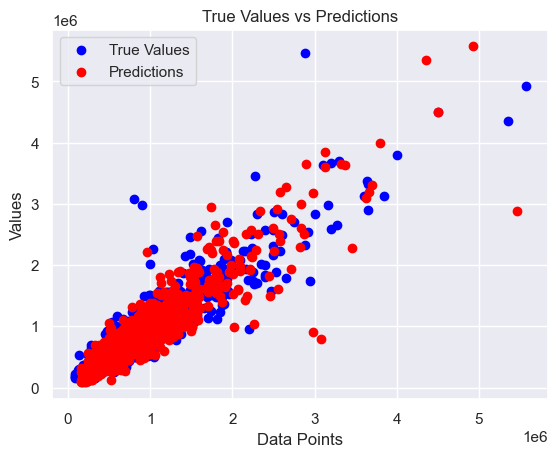

          y_test     y_pred
735    365000.00  394179.18
2830   865000.00  939323.47
4106  1038000.00 1077720.18
16218 1490000.00 2174381.40
19964  711000.00  701083.87
...          ...        ...
13674  338000.00  355251.26
20377  673000.00  714602.76
8805   285000.00  312829.63
10168  605000.00  604175.28
2522   356500.00  338149.54

[4323 rows x 2 columns]


In [153]:
evaluate(HistGradientBoostingRegressor())

MAE: 72550.51307850039
MSE: 21350460430.712852
RMSE: 146117.96751499403
R2: 0.8587714991814521


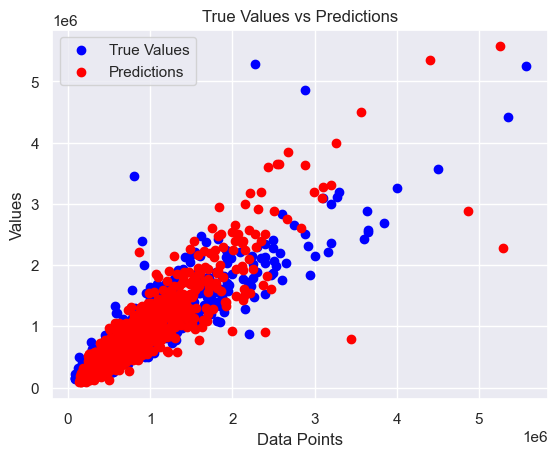

          y_test     y_pred
735    365000.00  378556.00
2830   865000.00  896350.50
4106  1038000.00 1086054.50
16218 1490000.00 2041858.80
19964  711000.00  708697.00
...          ...        ...
13674  338000.00  337783.00
20377  673000.00  722938.17
8805   285000.00  279822.80
10168  605000.00  581875.79
2522   356500.00  344122.78

[4323 rows x 2 columns]


In [154]:
evaluate(RandomForestRegressor())

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.042304 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2326
[LightGBM] [Info] Number of data points in the train set: 17290, number of used features: 18
[LightGBM] [Info] Start training from score 537768.047947
MAE: 69868.42860717868
MSE: 17564856815.70854
RMSE: 132532.47457022956
R2: 0.8838124169160062


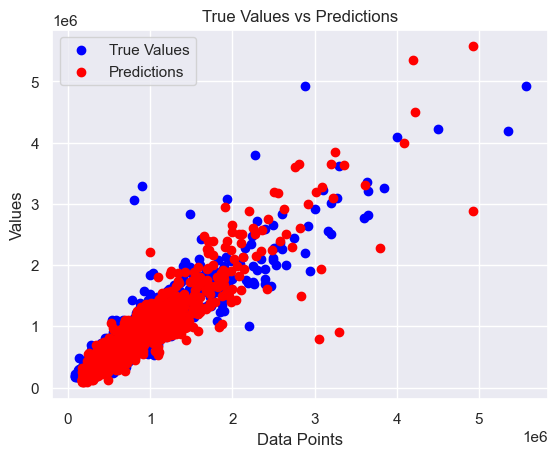

          y_test     y_pred
735    365000.00  397747.02
2830   865000.00  928653.35
4106  1038000.00 1106164.53
16218 1490000.00 1960931.65
19964  711000.00  686180.91
...          ...        ...
13674  338000.00  351986.73
20377  673000.00  693890.72
8805   285000.00  309290.36
10168  605000.00  604696.90
2522   356500.00  334032.09

[4323 rows x 2 columns]


In [155]:
evaluate(LGBMRegressor())

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003353 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2326
[LightGBM] [Info] Number of data points in the train set: 17290, number of used features: 18
[LightGBM] [Info] Start training from score 537768.047947


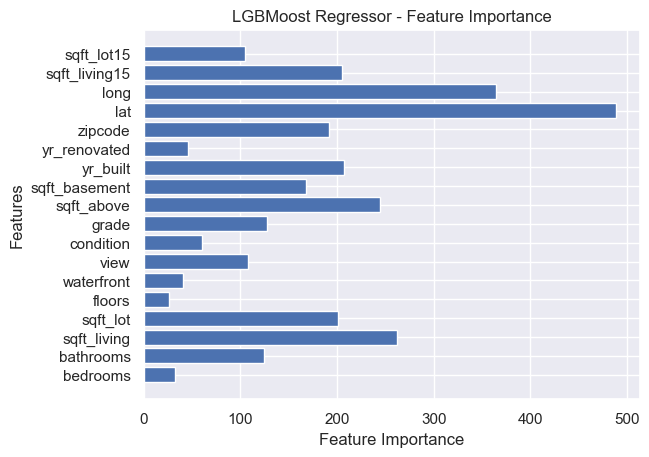

In [156]:
lgb = LGBMRegressor()
lgb = lgb.fit(X_train,y_train)
feature_importances = lgb.feature_importances_
features = X.columns

plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('LGBMoost Regressor - Feature Importance')
plt.show()